### **Introduction to Regression with Neural Networks in TensorFlow**

There are many definitions for a regression problem but in our case, we're going to simplify it: predicting a numerical variable based on some other combination of variables, even shorter... predicting a number.

### **What is Regression problems?**

A regression problem refers to a type of supervised learning task in which the goal is to predict a continuous numerical value based on one or more independent features.
 It involves modeling the relationship between a dependent variable (often called the outcome or response variable) and one or more independent variables (often called regressors, predictors, or features)

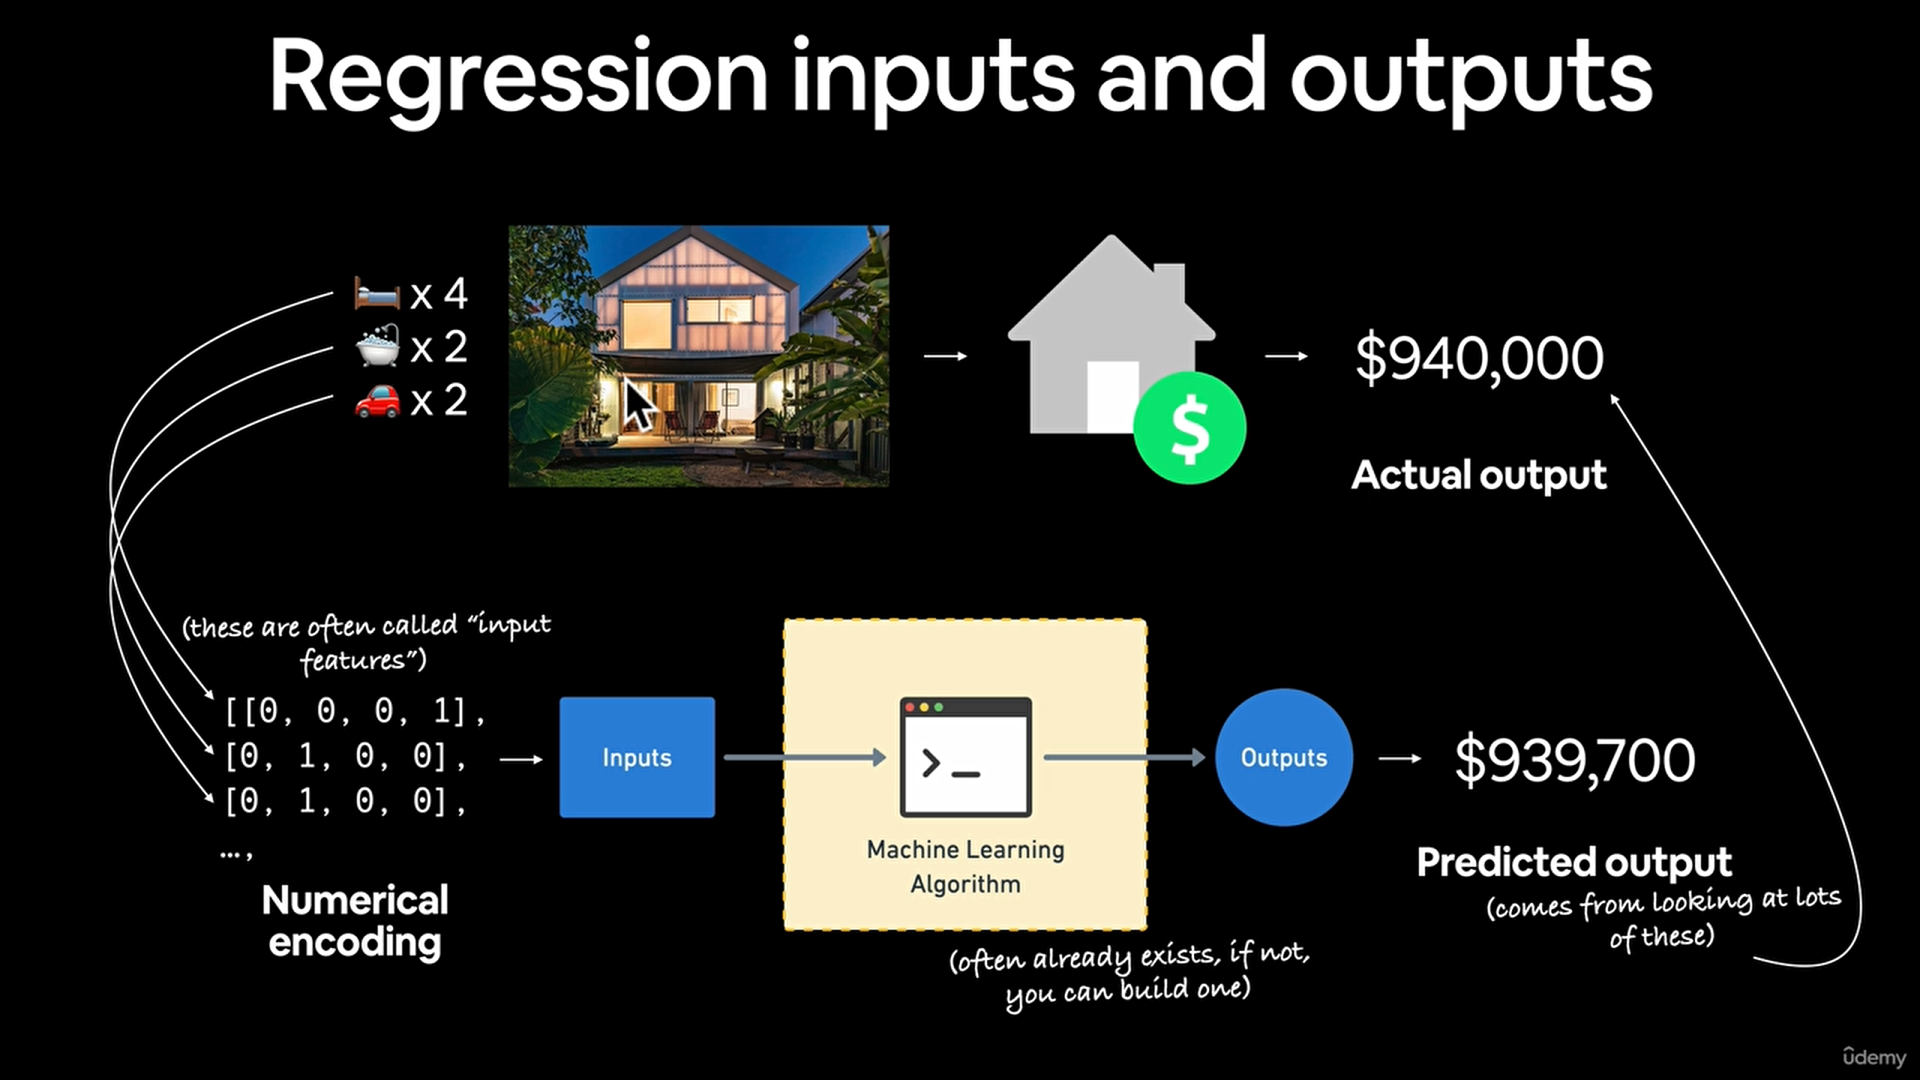

### Anatomy of Neural Networks

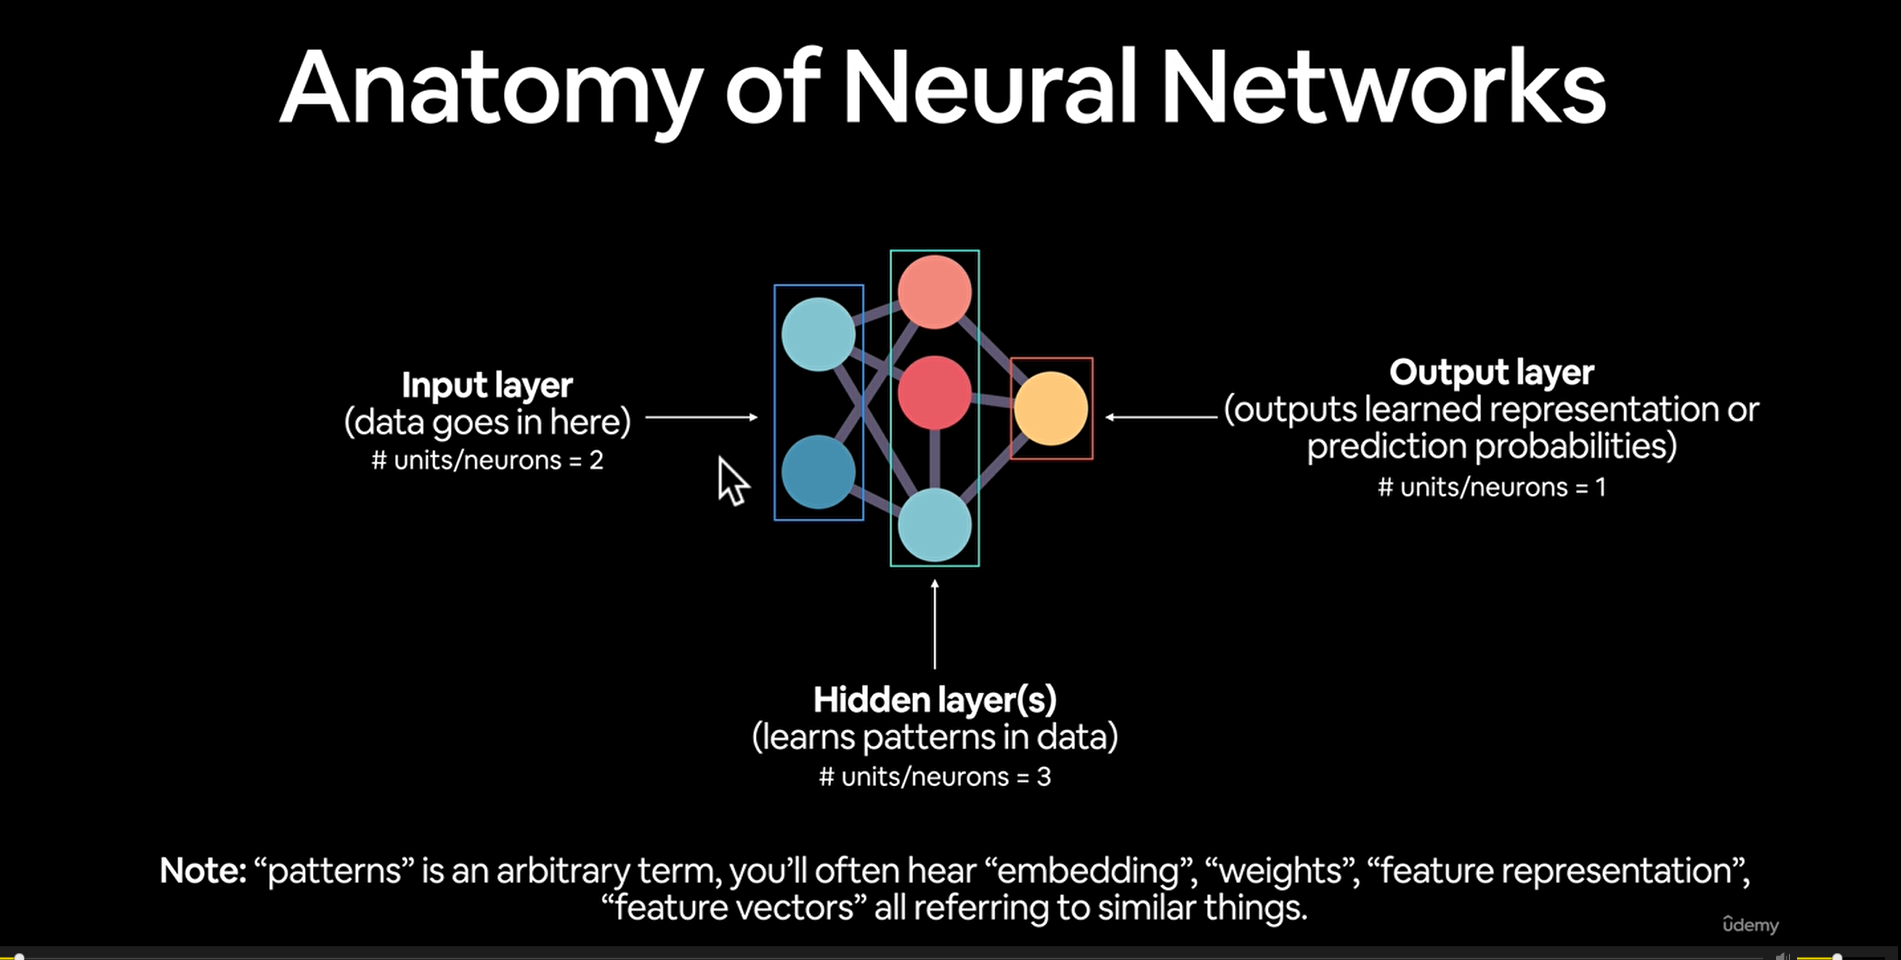

### Architecture of a regression model

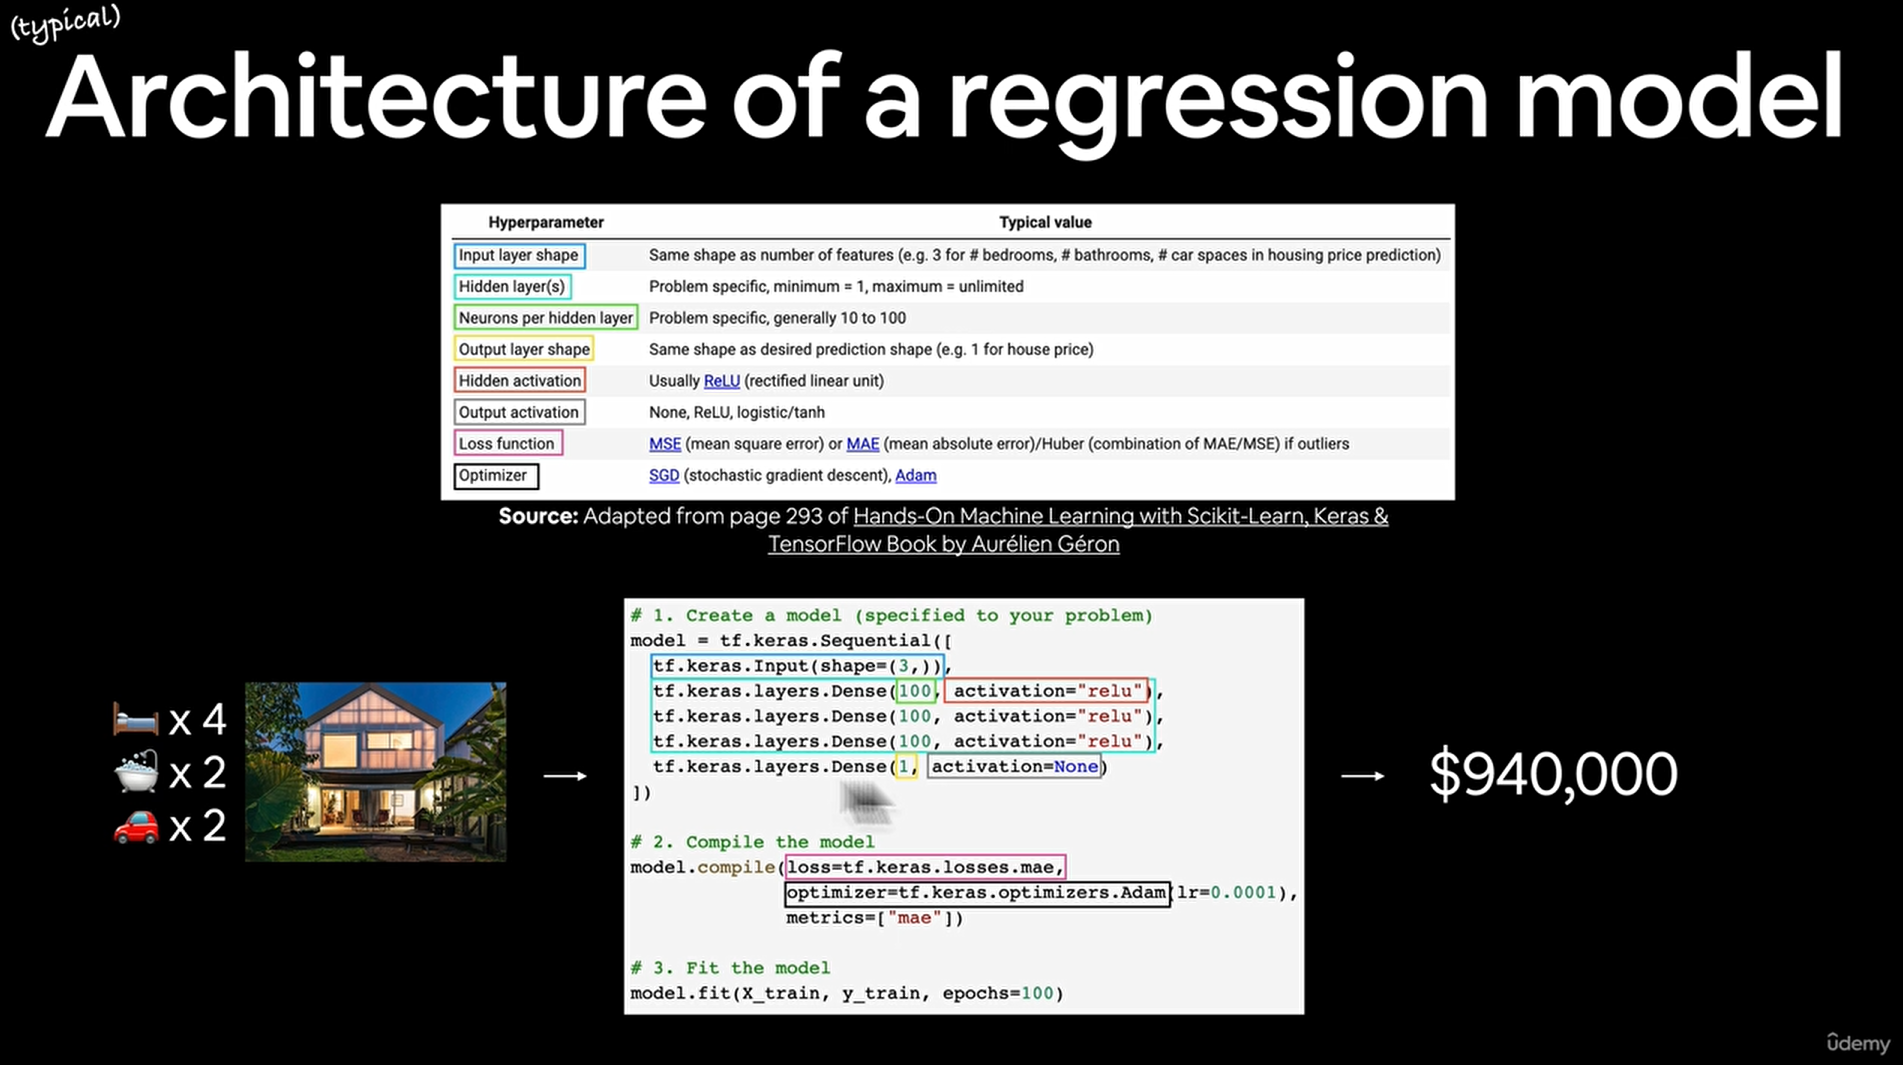

In [ ]:
# Import TensorFlow
import tensorflow as tf
print(tf.__version__)

2.18.0


### Creating data to view and fit

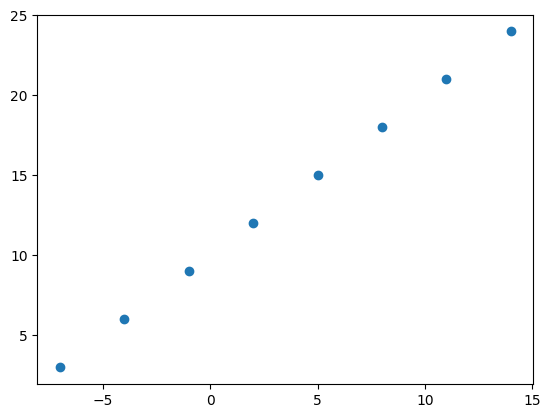

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, y);

In [ ]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

### **Input and Output Shapes**
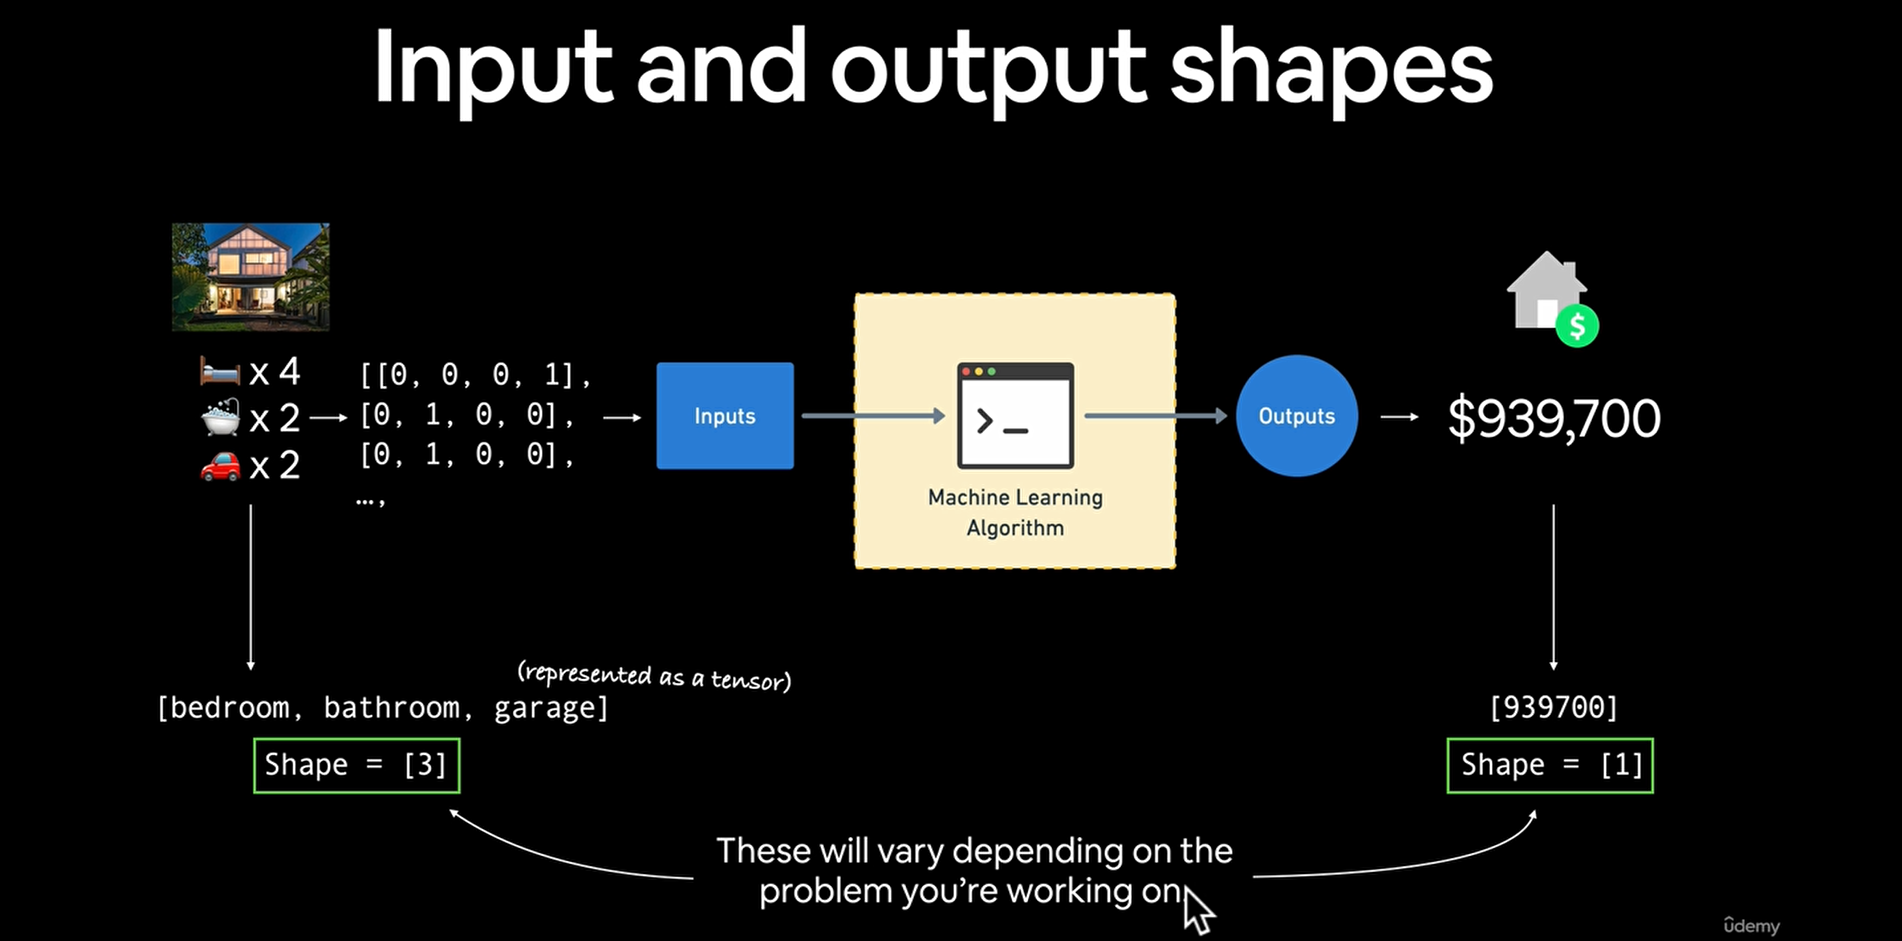

In [ ]:
# Create a demo tensor for our housing price prediction problem
house_info = tf.constant(['bedroom', 'bathroom', 'garage'])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [ ]:
X[0], y[0]

(np.float64(-7.0), np.float64(3.0))

In [ ]:
X[1],  y[0]

(np.float64(-4.0), np.float64(3.0))

In [ ]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

((), ())

In [ ]:
# no dimension, bec
X[0].ndim

0

In [ ]:
# Turns our NumPy arrays into tensors with dtype float32
X = tf.cast(tf.constant(X), dtype=tf.float32)
y = tf.cast(tf.constant(y), dtype=tf.float32)
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

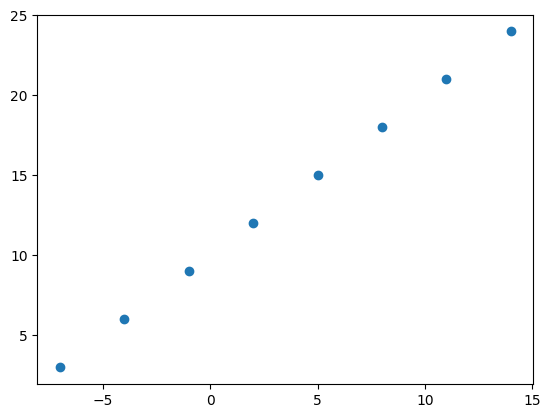

In [ ]:
plt.scatter(X, y)

### **Steps in  modelling with TensorFlow**

1. **Creating a model-** define the input and output layers, as well as the hidden layers of a deep learning model.
2. **Compiling a model-** define the loss function (in other words, the function which tells our model how wrong it is) and the optimizer (tells our model how to improve the patterns its learning) and evaluating metrics (what we can use to interpret the performance of our model).
3. **Fitting a model-** letting the model try to find patterns between X and y (features and labels).

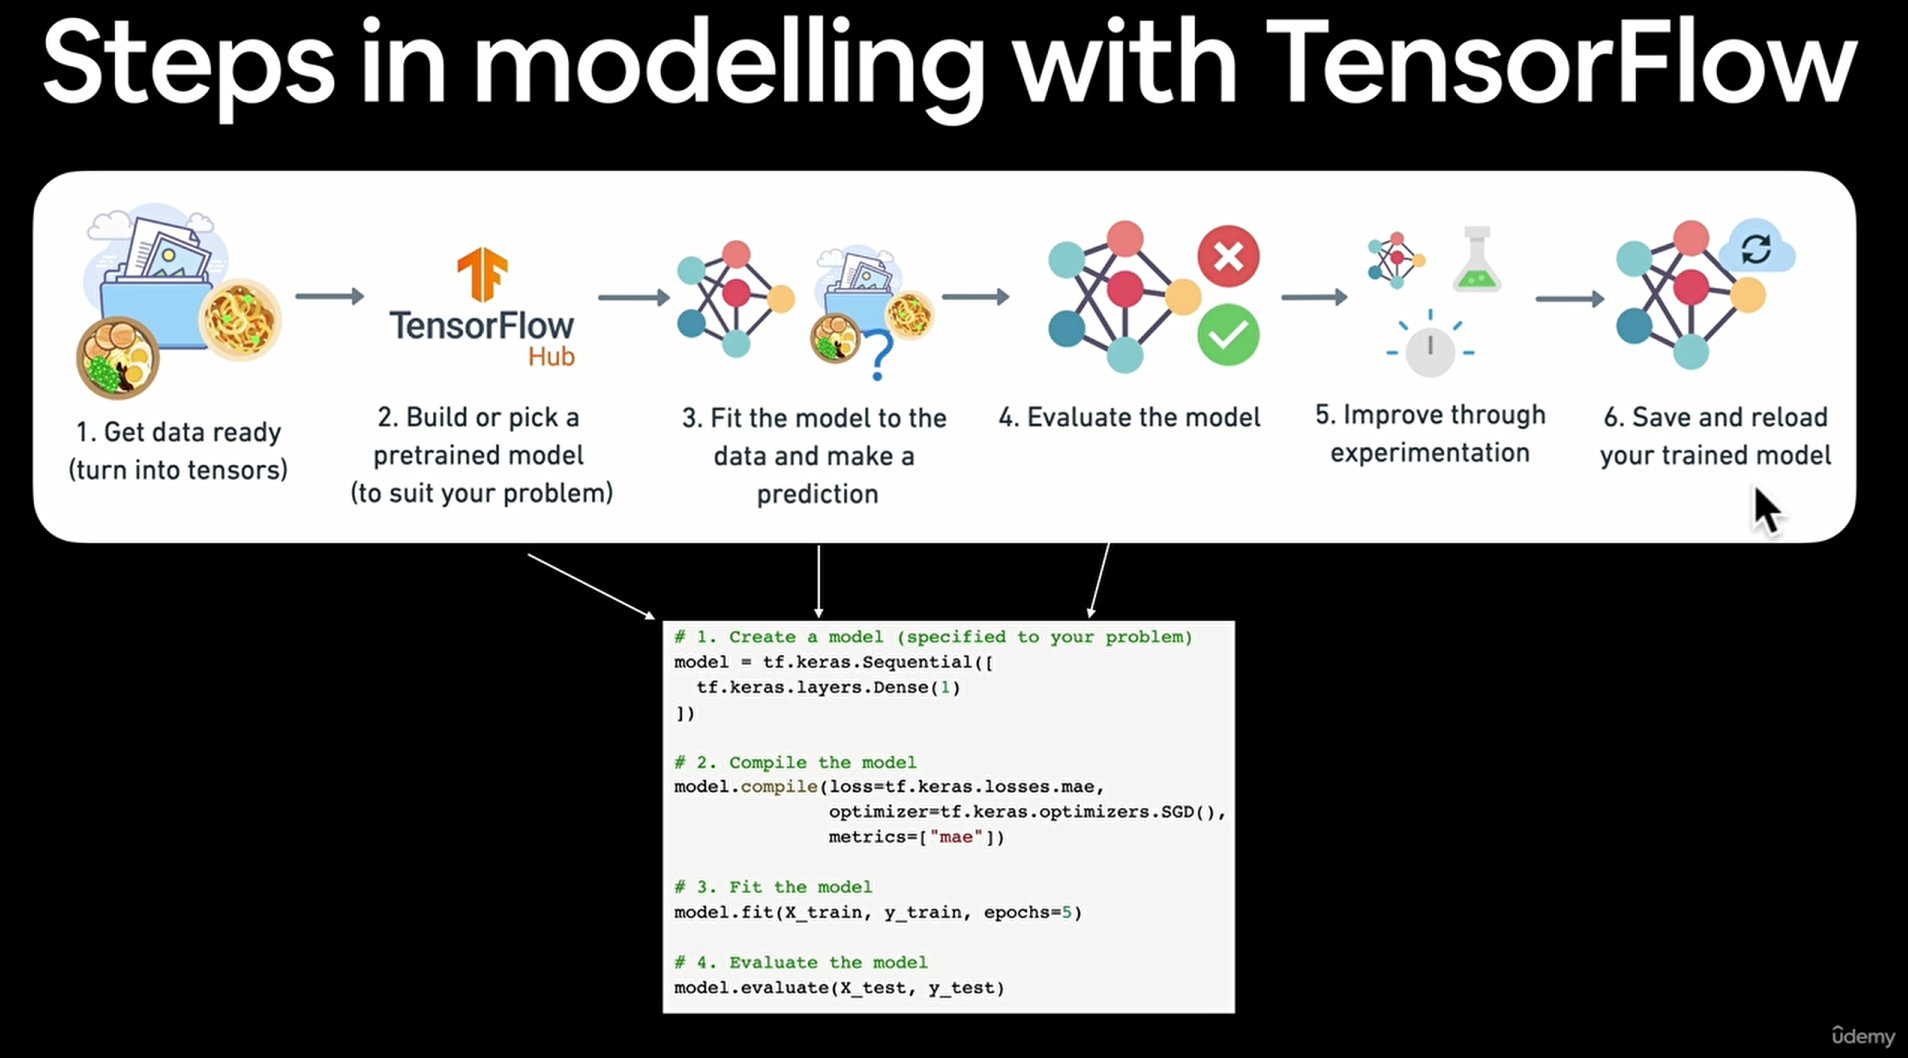

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

In [ ]:
# 2. Compile the model
model.compile(loss= tf.keras.losses.mae, # mae is short form of mean absolute error
            optimizer=tf.keras.optimizers.SGD(),  # SGD is short form of Stochasitic gradient descent
            metrics = ['mae'])

In [ ]:
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)


Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 515ms/step - loss: 20.0732 - mae: 20.0732
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 19.7920 - mae: 19.7920
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 19.5107 - mae: 19.5107
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 19.2295 - mae: 19.2295
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 18.9482 - mae: 18.9482


In [ ]:
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
# Fit the model
pred = model.predict(np.array([[17.0]]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


In [ ]:
pred

array([[-19.213245]], dtype=float32)

In [ ]:
pred + 8

array([[-11.213245]], dtype=float32)

### Steps in modelling with TensorFlow
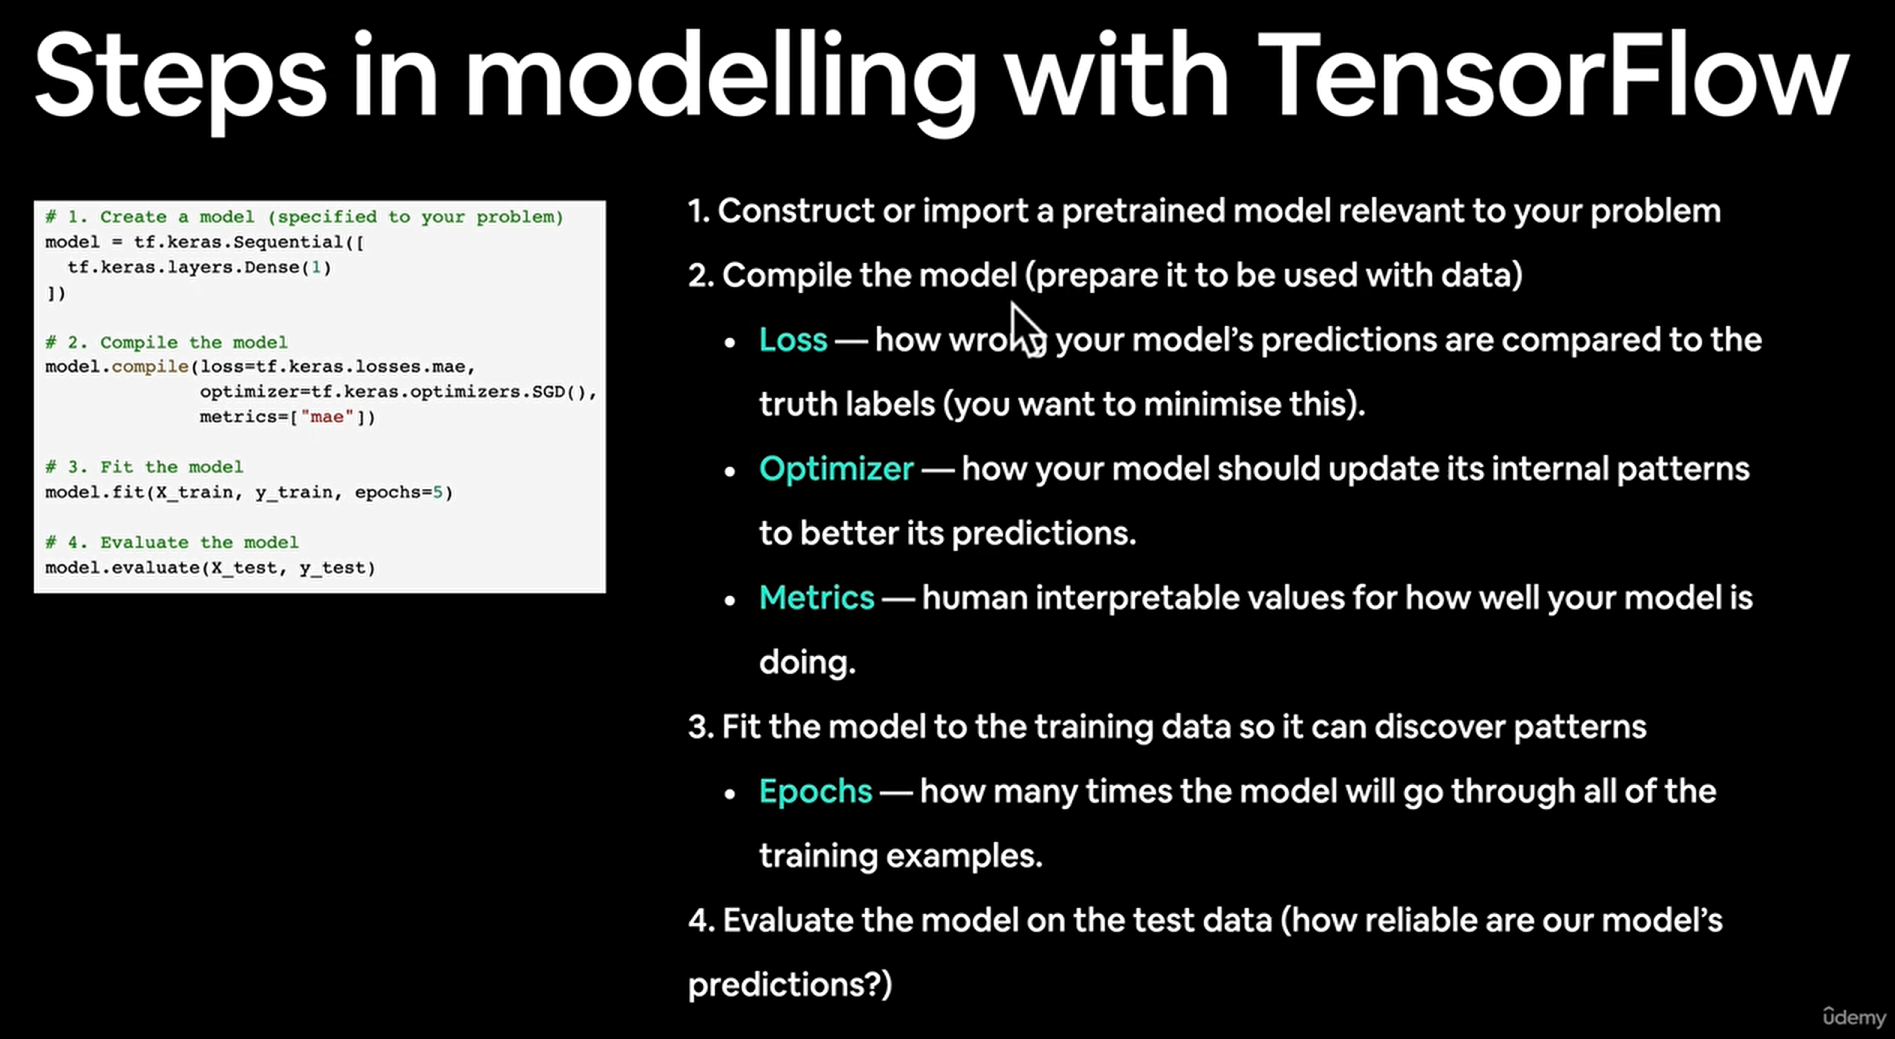

### **Improving our model**

We can improve our model, by altering the steps we took to create a model.
1. **Creating a model** - here we might add more layers, increase the number of hidden units (all called neurons) within each of the hidden layers, change the activation function of each layer.
2. **Compiling a model** - here we might change the optimization function or perhaps the **learning rate** of the optimization function.
3. **Fitting a model**- here we might fit a model for more **epochs** (leave it training for longer) or on more data (give the model more exmaples to learn from.)

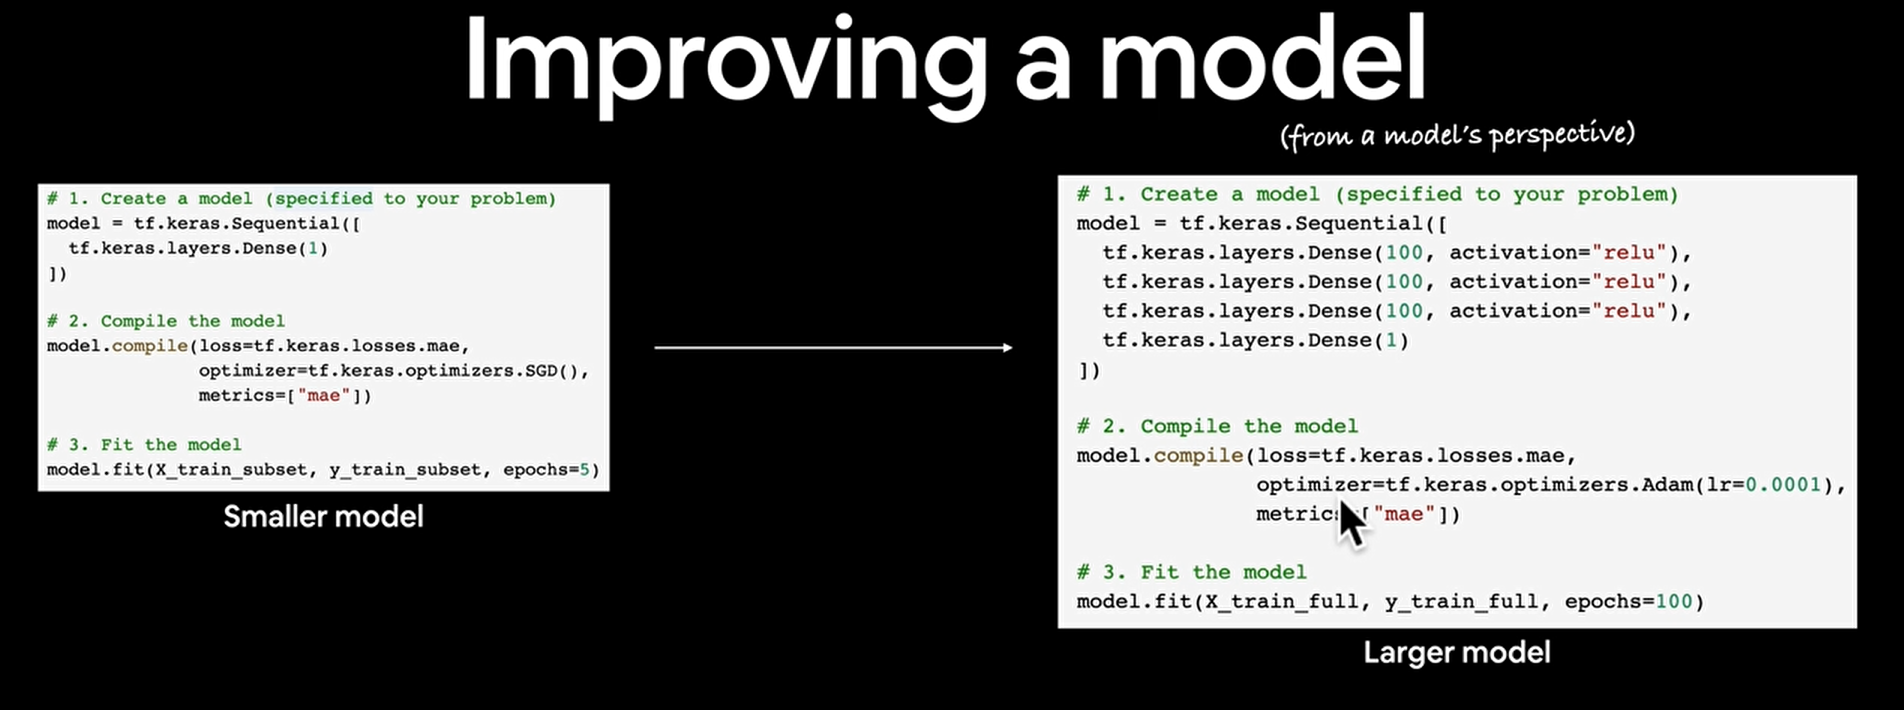

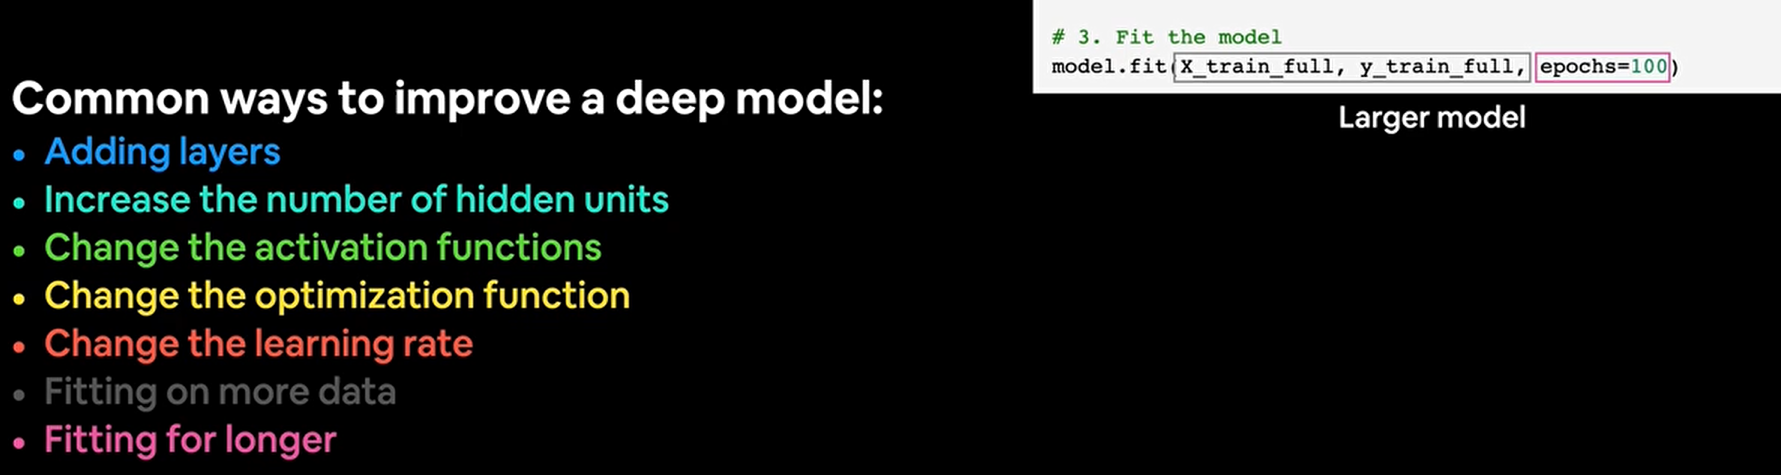

> **Note-** learning rate is most important hyperparameters in neural network from above result,we got

In [ ]:
# Let's rebuild our model

# 1. Create the model
model = tf.keras.Sequential([
  # tf.keras.layers.Dense(100, activation='relu'), # it increasing error on test set
  tf.keras.layers.Dense(50, activation=None),
  tf.keras.layers.Dense(1)
])


In [ ]:
# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics = ['mae'])

In [ ]:
# 3. Fit the model (this time we'll train for longer)
model.fit(tf.expand_dims(X, axis=-1), y, epochs= 100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 12.4790 - mae: 12.4790
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step - loss: 11.8257 - mae: 11.8257
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 11.1650 - mae: 11.1650
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 10.4937 - mae: 10.4937
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step - loss: 9.8068 - mae: 9.8068
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step - loss: 9.0998 - mae: 9.0998
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step - loss: 8.3688 - mae: 8.3688
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - loss: 7.6108 - mae: 7.6108
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step - loss: 6.8455 - mae: 6.8455
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step - loss: 6.7846 - mae: 6.7846
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step - loss: 7.0542 - mae: 7.0542
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step - loss: 7.2029 - mae: 7.2029
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━

In [ ]:
# Remind ourselves of the data
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
# Let's see if our model's prediction has improved...
model.predict(np.array([[17.0]]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 386ms/step


array([[27.893147]], dtype=float32)

### Evaluting a model
In practice, a typical workflow you'll go through when building neural newtork is:

```
Build a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it...
```

when it comes to evaluation... there are 3 words you should memorize:
> "Visualize, visualize, visualize"
It's  a good idea to visualize:
* The data - what data are we working with? What does it look like?
* The model itself - what does our model look like?
* The training of a model-  how does a model perform while it learns?
* The predictions of the model- how do the predictions of a model line up against the ground truth (the original labels)?

In [ ]:
# Make a bigger dataset
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [ ]:
# Make labels for the dataset
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

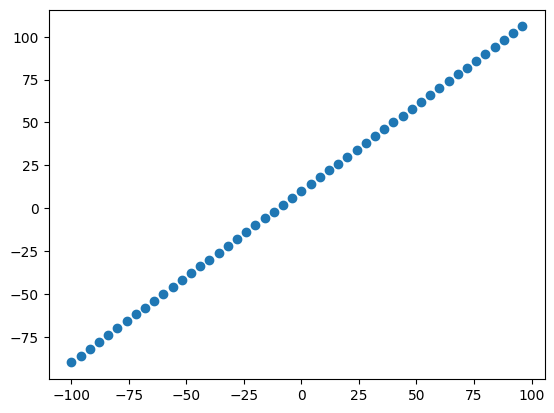

In [ ]:
# Visualize the data
plt.scatter(X, y);

### The 3 sets...

* **Training set**- the model learns from this data, which is typically 70-80% of the total data you have available.
* **Validation set**- the model gets tuned on this data, which is typically 10-15% of the data available.
* **Test set**- the model gets evaluated on this data to test what is has learned, this set is typically 10-15% of the total data available.

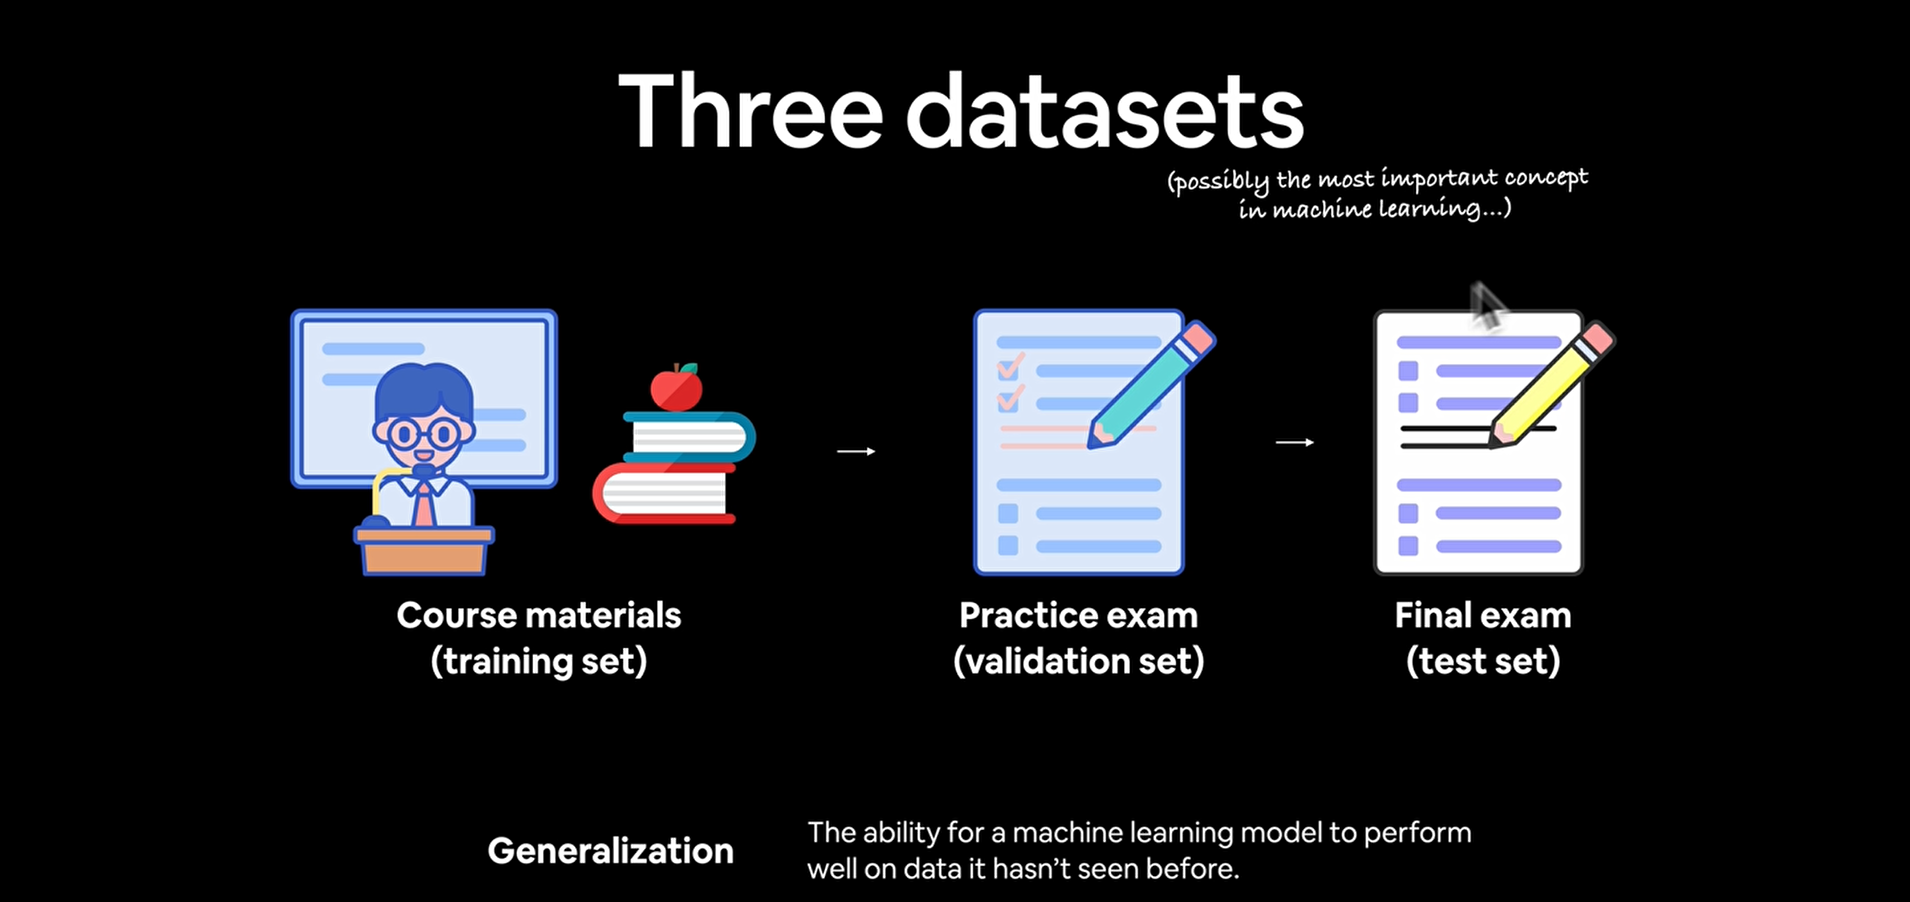

In [ ]:
# Check the length of how many samples we have
len(X)

50

In [ ]:
# Split the data into train and test sets
X_train = X[:40] # first 40 are training samples (80% of the data)
y_train = y[:40]

X_test = X[40:] # last 10 are testing samples (20% of the data)
y_test = y[40:]

len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

 ### Visualising the data

Now we've got our data in training and test sets...let's visualize it again!

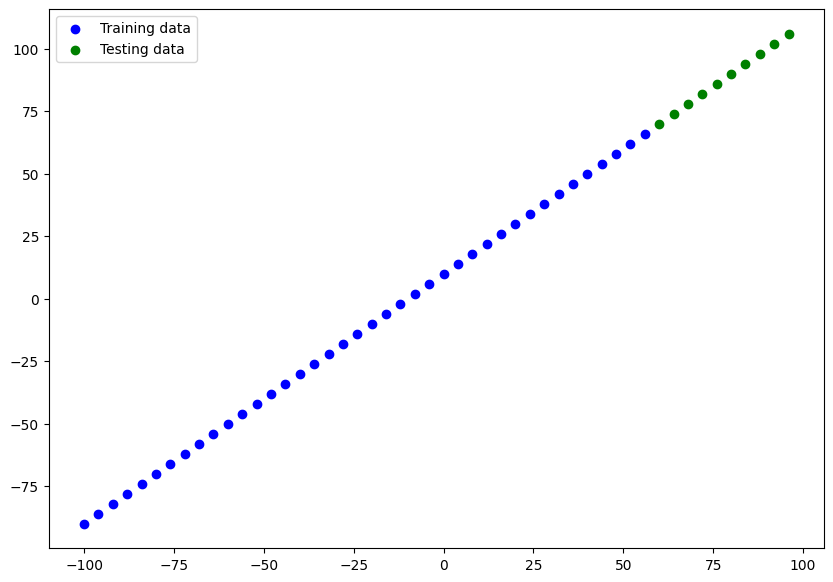

In [ ]:
plt.figure(figsize=(10, 7))
# Plot training data in blue
plt.scatter(X_train, y_train, c='b', label='Training data')
# Plot test data in green
plt.scatter(X_test, y_test, c='g', label="Testing data")
# show  a legend
plt.legend();


In [ ]:
# Let's have a look at how to build a neural network for our data

# 1. Create a model
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ['mae'])

# # 3. Fit the model
# model.fit(X_train, y_train, epochs=100)

### Visualizing the model

In [ ]:
model.summary()

Model: "sequential_30"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_65 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

* **Total params:** - total number of parameters in the model.
* **Trainable parameters** - these are the parameters (patterns) the model can update as it trains.
* **Non-trainable parameters** - these parameters aren't updated  during training (this is typical when you bring in already learn patterns or parameters from other models during **transfer learning**).

**Resource:** For a more in-depth overview of the trainable parameters within a layer, check out MIT's introduction to deep learning video.

**Exercise:** Try playing around with the number of hidden units in the dense layer, see how that effects the number of parameters(total and trainable) by calling `model.summary()`.

In [ ]:
# Let's fit our model to the training data
model.fit(tf.expand_dims(X_train, axis = -1), y_train, epochs=100, verbose=0)

In [ ]:
# Get a summary of our model
model.summary()

Model: "sequential_30"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_65 (Dense)                │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4 (20.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [ ]:
tf.random.set_seed(42)
# 1. Create model with Input() layer
model_0 = tf.keras.Sequential([
  tf.keras.layers.Input(shape=(1,), name='input_layer'),  # ✅ Preferred
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1, name='output_layer')
], name='model_1')

# 2. Compile model
model_0.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=['mae'])

# Let's fit our model to the training data
model_0.fit(tf.expand_dims(X_train, axis = -1), y_train, epochs=100, verbose=0)

In [ ]:
model_0.summary()

Model: "model_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_66 (Dense)                │ (None, 10)             │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 95 (384.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 64 (260.00 B)

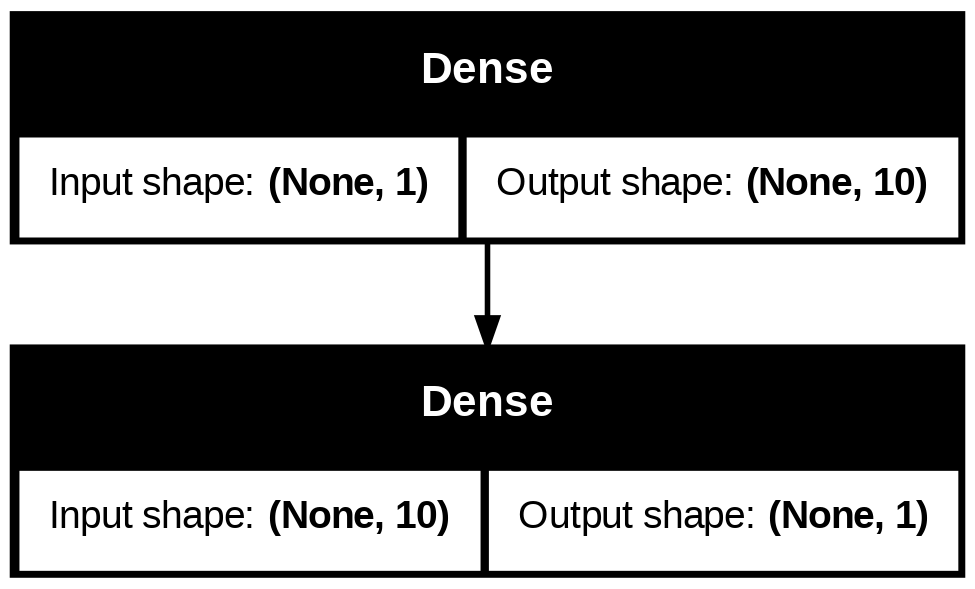

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model = model_0, show_shapes=True)

### Visualizing the model's predictions

To vsualize predictions, it's a good idea to plot them against the ground truth labels,
Often you'll see this in the form of `y_test` or `y_ture` and `y_pred` (ground truth versus your model

In [ ]:
# Make some predictions
y_pred_0 = model_0.predict(X_test)
y_pred_0

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


array([[ 68.067406],
       [ 71.95575 ],
       [ 75.8441  ],
       [ 79.73245 ],
       [ 83.620804],
       [ 87.50916 ],
       [ 91.39751 ],
       [ 95.28585 ],
       [ 99.17422 ],
       [103.06257 ]], dtype=float32)

In [ ]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [ ]:
import pandas as pd
important_features = pd.DataFrame({
  'y_test': tf.squeeze(y_test),
  'Model_pred': tf.squeeze(y_pred_0)
})

important_features

y_test  Model_pred
0      70   68.067406
1      74   71.955750
2      78   75.844101
3      82   79.732452
4      86   83.620804
5      90   87.509163
6      94   91.397507
7      98   95.285851
8     102   99.174217
9     106  103.062569

**Note:** If you feel like you're going to reuse some kind of functionality in the future, it's a good idea to turn it into a function.

In [ ]:
# Let's create a plotting function
def plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions = y_pred_0):
  """
  Plots training data, test data and compares predictions to ground truth  labels.
  """
  plt.figure(figsize=(10, 7))
  # Plot training data in blue
  plt.scatter(train_data, train_labels, c='b', label='Training data')
  # Plot testing data in green
  plt.scatter(test_data, test_labels, c='g', label="Testing data")
  # Plot model's prediction in red
  plt.scatter(test_data, predictions, c='r', label="Predictions")
  # show  a legend
  plt.legend();

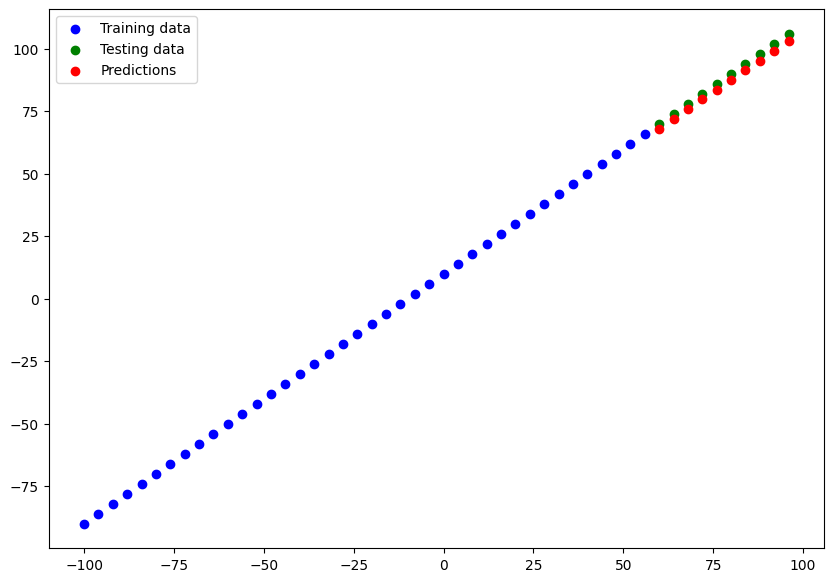

In [ ]:
plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions = y_pred_0)

### Evaluting our model's predictions with regression evaluation metrics

Depending on the problem you're' working on , there will be different evaluation metrics to evaluate your model's performance.

Since we're working on a regression, two of the main metrics:
* **MAE** - mean absolute error, "on average, how wrong is each of my model's predictions".
* **MSE** - mean square error, "square the average errors"
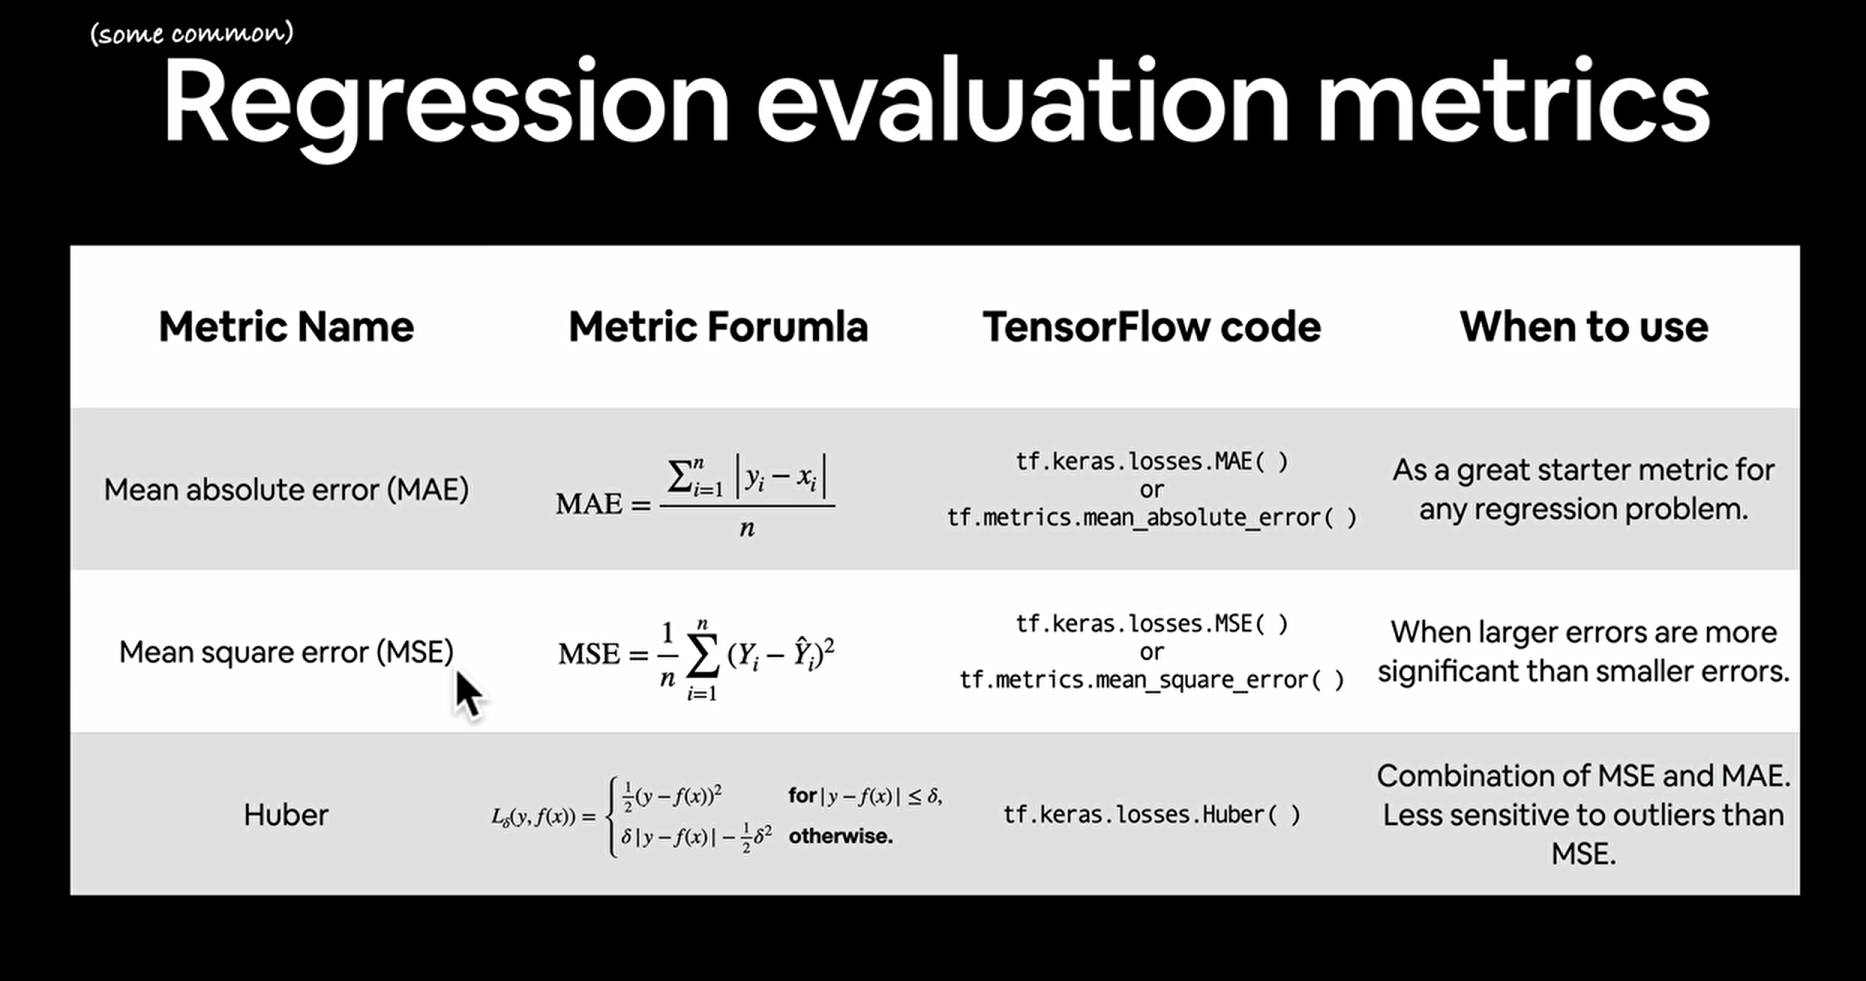

In [ ]:
# Evaluate the model on the test
model_0.evaluate(X_test, y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step - loss: 2.4350 - mae: 2.4350


[2.4350180625915527, 2.4350180625915527]

In [ ]:
# Calculate the mean absolute error
""" mae = tf.metrics.mean_absolute_error(y_true = y_test, y_pred=y_pred) """  # not supported by current version of tensorflow

mae = tf.keras.losses.mae(y_true = y_test, y_pred=tf.squeeze(y_pred_0))
mae.numpy()

np.float32(2.435018)

In [ ]:
# Calculating mae by using scikit-learn
import sklearn
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_true = y_test, y_pred=y_pred_0)
mae

2.4350180625915527

In [ ]:
# Calculate the mean  square error
"""
mse = tf.metrics.mean_squared_error(y_true = y_test, y_pred=y_pred)
"""  # not supported by current version of tensorflow

mse = tf.keras.losses.mse(y_true = y_test, y_pred=tf.squeeze(y_pred_0))
mse.numpy()

np.float32(6.032153)

In [ ]:
# Calculating mse by using scikit-learn
import sklearn
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_true = y_test, y_pred=y_pred_0)
mse

6.0321526527404785

In [ ]:
# Calculating huber, which is combination of mae and mse
# Step 1: Define Huber loss object
huber = tf.keras.losses.Huber()

# Step 2: Use it to calculate loss between y_test and y_pred
loss = huber(y_test, y_pred_0)

# Print loss value
print(loss.numpy())

1.9350182


In [ ]:
# make some functions to reuse MAE and MSE
def calculate_mae(y_true, y_pred):
  return mean_absolute_error(y_true = y_test, y_pred=y_pred_0)

def calculate_mse(y_true, y_pred):
  return mean_squared_error(y_true = y_test, y_pred=y_pred_0)

In [ ]:
# Calculate model_0 evaluation metrics
mae_0 = calculate_mae(y_test, y_pred_0)
mse_0 = calculate_mse(y_test, y_pred_0)
mae_0, mse_0

(2.4350180625915527, 6.0321526527404785)

### Running experiments to improve our model
```
Build a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it...
```

1. Get more data- get more examples for your model to train on (more opportunities to learn patterns or relationship bewteen features and  labels).
2. Make your model larger ( using a more complex model)- this might come in the form of more layers or more hidden units in each layer.
3. Train for longer- give your model more of a chance to find patterns in the data.

Let's do 3 modelling experiments:

1. `model_1` - same as the original model, 1 layer, trained for 100 epochs
2. `model_2` - 2 layers, trained for 100 epochs
3. `model_3` - 2 layers, trained for 500 epochs

**Build `model_1`**

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_1 = tf.keras.Sequential({
  tf.keras.layers.Dense(1)
})

# 2. Compile the model
model_1.compile(loss= tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ['mae'])

# 3 Fit the model
model_1.fit(tf.expand_dims(X_train, axis = -1), y_train, epochs=100, verbose=0)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


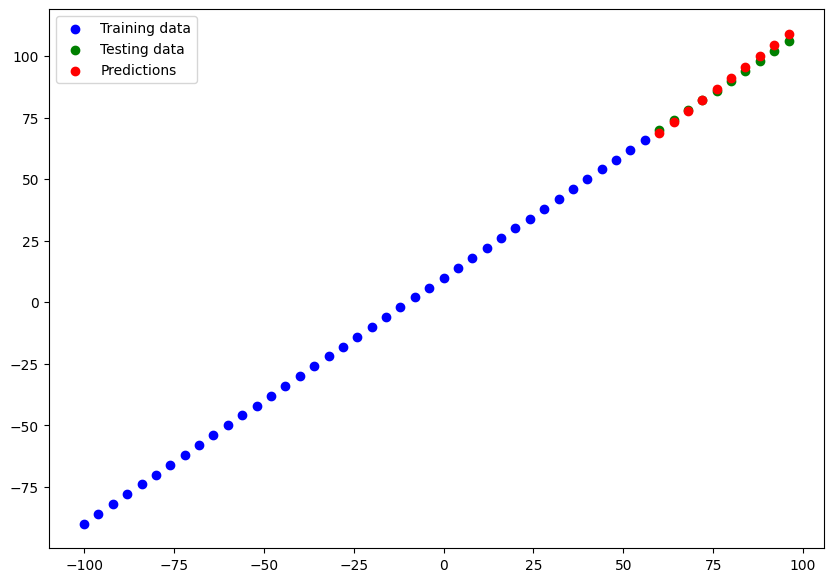

In [ ]:
# Make  and plot predictions for model_1
y_pred_1 = model_1.predict(X_test)
plot_predictions(predictions=y_pred_1)

In [ ]:
# Calculate model_1 evaluation metrics
mae_1 = calculate_mae(y_test, y_pred_1)
mse_1 = calculate_mse(y_test, y_pred_1)
mae_1, mse_1

(2.4350180625915527, 6.0321526527404785)

**Build `model_2**
* 2 dense layers, trained for 100 epochs

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_2 = tf.keras.Sequential({
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
})

# 2. Compile the model
model_2.compile(loss= tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ['mse'])

# 3 Fit the model
model_2.fit(tf.expand_dims(X_train, axis = -1), y_train, epochs=100, verbose=0)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


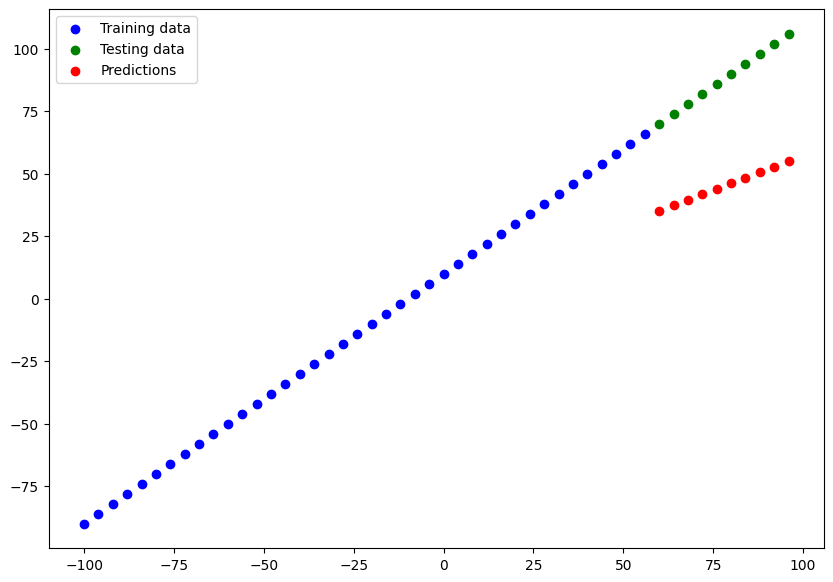

In [ ]:
# Make  and plot predictions for model_2
y_pred_2 = model_2.predict(X_test)
plot_predictions(predictions=y_pred_2)

In [ ]:
# Calculate model_2 evaluation metrics
mae_2 = calculate_mae(y_test, y_pred_2)
mse_2 = calculate_mse(y_test, y_pred_2)
mae_2, mse_2

(2.4350180625915527, 6.0321526527404785)

**Build `model_3`**
* 2 layers, trained for 500 epochs

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ['mse'])

# 3. Fit the model
model_3.fit(tf.expand_dims(X_train, axis = -1), y_train, epochs=500, verbose=0)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


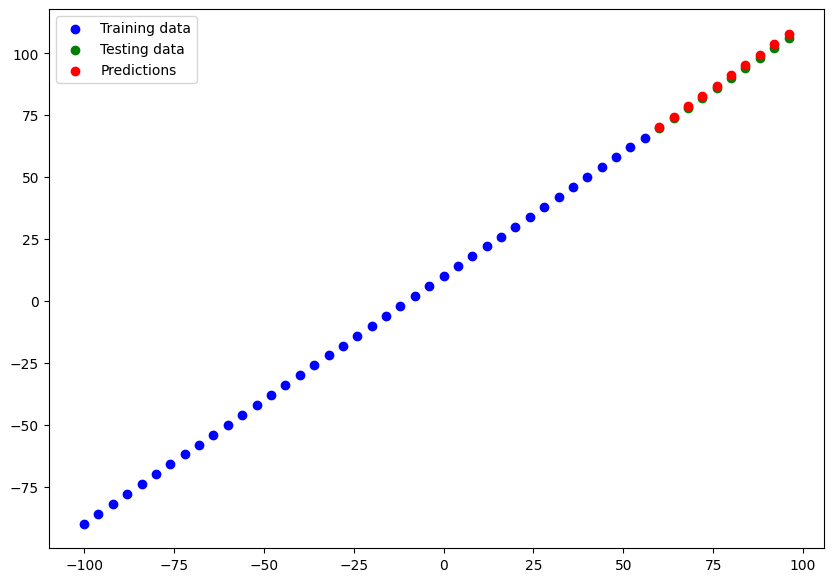

In [ ]:
# Make and plot some predictions
y_pred_3 = model_3.predict(X_test)
plot_predictions(predictions=y_pred_3)

In [ ]:
# Calculate model_2 evaluation metrics
mae_3 = calculate_mae(y_test, y_pred_3)
mse_3 = calculate_mse(y_test, y_pred_3)
mae_3, mse_3

(2.4350180625915527, 6.0321526527404785)

**Note:** You want to start with small experiments (small models) and make sure they work and then increase their scale when necessary.

### Comparing the results of our experiments
We've run a few experiments, let's compare the results.

In [ ]:
# Let's compare our model's result using a pandas DataFrame
# base model =  model_0, i have created before experiments
model_results = [
            ['model_0', mae_0, mse_0],
            ['model_1', mae_1, mse_1],
            ['model_2', mae_2, mse_2],
            ['model_3', mae_3, mse_3]
            ]
all_results = pd.DataFrame(model_results, columns=['model','mae','mse'])

all_results


model       mae       mse
0  model_0  2.435018  6.032153
1  model_1  2.435018  6.032153
2  model_2  2.435018  6.032153
3  model_3  2.435018  6.032153

Looks like `model_0` performed the best...

In [ ]:
model_0.summary()

Model: "model_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_66 (Dense)                │ (None, 10)             │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 95 (384.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 64 (260.00 B)

In [ ]:
model_1.summary()

Model: "sequential_31"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_67 (Dense)                │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4 (20.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [ ]:
model_2.summary()

Model: "sequential_32"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_68 (Dense)                │ (None, 10)             │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_69 (Dense)                │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33 (136.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [ ]:
model_3.summary()

Model: "sequential_33"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_70 (Dense)                │ (None, 10)             │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_71 (Dense)                │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33 (136.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

🔑**Note:** One of your main goals shoud be to minimize the time between your experiments. The more experiments you do, the more things you'll figure out which don't work and in turn, get closer to figure out what doew work. Remember the machine learning practioner's motto: ***experiments, experiments, experiments***.

## Tracking your experiments

One really good habit in machine learning modelling is to track the results of your experiments.

And when doing so, it can be tedious if you're running lots of experiments.

Luckily, there are tools to help us!

🧾 **Resources:** As you build more models, you'll want to look
into using:

* **TensorBord** - a component of the TensorFlow library to help track modelling experiments (we'll see this one later).
* **Weights & Biases** - a tool for tracking all of kinds of machine learning experiments (plug straight into TensorBoard).

## Saving our models
Saving our models allows us to use them outside of Google Colab (or wherever they were trained) such as in a web application or a mobile app.

There are three main features we can save our model's too:
1. `.keras` format (new way)
2. the HDF5 format

In [ ]:
# Save the entire model as a `.keras` zip archive, i.e. new format
model_0.save('my_model.keras')

In [ ]:
# Save model using the HDF5 format
model_0.save('best_model_HDF5_format.h5')

## Loading in a saved model

In [ ]:
# Load in a model using the .h5 format
loaded_h5_model = tf.keras.models.load_model("/content/best_model_HDF5_format.h5")
loaded_h5_model.summary()

Model: "model_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_66 (Dense)                │ (None, 10)             │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33 (136.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [ ]:
model_0.summary()

Model: "model_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_66 (Dense)                │ (None, 10)             │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 95 (384.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 64 (260.00 B)

In [ ]:
# Check to see if loaded .h5 model predictions match model_0
model_0_preds = model_0.predict(X_test)
loaded_h5_model_preds = loaded_h5_model.predict(X_test)
model_0_preds == loaded_h5_model_preds

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [ ]:
# Load in a model using the .keras format
loaded_keras_model = tf.keras.models.load_model("/content/my_model.keras")
loaded_keras_model.summary()

Model: "model_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_66 (Dense)                │ (None, 10)             │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 95 (384.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 64 (260.00 B)

In [ ]:
model_0.summary()

Model: "model_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_66 (Dense)                │ (None, 10)             │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 95 (384.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 64 (260.00 B)

In [ ]:
# Check to see if loaded .h5 model predictions match model_0
model_0_preds = model_0.predict(X_test)
loaded_keras_model_preds = loaded_keras_model.predict(X_test)
model_0_preds == loaded_keras_model_preds

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [ ]:
#  Compare the MAE AND MSE of model_0 preds and loaded keras preds

calculate_mae(y_test, model_0_preds) == calculate_mae(y_test, loaded_keras_model_preds), calculate_mse(y_test, model_0_preds) == calculate_mse(y_test, loaded_keras_model_preds)

(True, True)

## Download a model (or any other file) from Google Colab
If you want to download your files from Google Colab:
1. You can go to the 'files' tab and right click on the file you're after and click "download".
2. Use code(see the cell below).
3. Save it to Google Drive by connecting Google Drive and copying it there (see 2nd code cell below).

In [ ]:
# Download a file from Google Colab
from google.colab import files
files.download("/content/my_model.keras")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Save a file from Google Colab to Google Drive (requires mounting Google Drive)
!cp /content/my_model.keras /content/drive/MyDrive/Colab_Notebooks

In [ ]:
!ls /content/drive/MyDrive/Colab_Notebooks

'00_DeepLearning&TensorFlowFundamentals.ipynb'	  my_model.keras
 01_NeuralNetworkRegressionWithTensorFlow.ipynb   Untitled0.ipynb


### A large example

In [ ]:
# Import required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Read in the insurance dataset
insurance = pd.read_csv("https://gist.githubusercontent.com/meperezcuello/82a9f1c1c473d6585e750ad2e3c05a41/raw/d42d226d0dd64e7f5395a0eec1b9190a10edbc03/Medical_Cost.csv")
insurance

age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]

In [ ]:
# Let's try one-hot encode our DataFrame so it'a all  numbers
insurance_one_hot = pd.get_dummies(insurance, dtype=int)
insurance_one_hot.head()

age     bmi  children      charges  sex_female  sex_male  smoker_no  \
0   19  27.900         0  16884.92400           1         0          0   
1   18  33.770         1   1725.55230           0         1          1   
2   28  33.000         3   4449.46200           0         1          1   
3   33  22.705         0  21984.47061           0         1          1   
4   32  28.880         0   3866.85520           0         1          1   

   smoker_yes  region_northeast  region_northwest  region_southeast  \
0           1                 0                 0                 0   
1           0                 0                 0                 1   
2           0                 0                 0                 1   
3           0                 0                 1                 0   
4           0                 0                 1                 0   

   region_southwest  
0                 1  
1                 0  
2                 0  
3                 0  
4                 0

In [ ]:
# Create X and y values (features and labels)
X = insurance_one_hot.drop(columns='charges')
y = insurance_one_hot['charges']


In [ ]:
X.columns.tolist()

['age',
 'bmi',
 'children',
 'sex_female',
 'sex_male',
 'smoker_no',
 'smoker_yes',
 'region_northeast',
 'region_northwest',
 'region_southeast',
 'region_southwest']

In [ ]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [ ]:
# Create training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

len(X), len(X_train), len(X_test), len(y_train), len(y_test)

(1338, 1070, 268, 1070, 268)

In [ ]:
# Build a neural network ( sort of like model_0 above)
tf.random.set_seed(42)

# 1. Creat a model
insurance_model = tf.keras.Sequential([
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model.compile(loss= tf.keras.losses.mae,
                        optimizer = tf.keras.optimizers.SGD(),
                        metrics=['mae'])

# 3. Fit the model
insurance_model.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 10166.1533 - mae: 10166.1533
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 7488.2627 - mae: 7488.2627
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 7358.3198 - mae: 7358.3198
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7210.8325 - mae: 7210.8325
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7474.1646 - mae: 7474.1646
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7528.4365 - mae: 7528.4365
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7381.4800 - mae: 7381.4800
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7964.0308 - mae: 7964.0308
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7703.3682 - mae: 7703.3682
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7360.7842 - mae: 7360.7842
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7340.2900 - mae: 7340.2900
Epoch 12/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/ste

In [ ]:
# Check the results of the insurance model on the test data
insurance_model.evaluate(X_test, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 8095.1934 - mae: 8095.1934  


[8065.1474609375, 8065.1474609375]

In [ ]:
y_train.median(), y_train.mean()

(9575.4421, np.float64(13346.089736364485))

Right now it looks like our model isn't performing too well.. let's try and improve it!

To (try) improve our model , we'll run 2 experiments:
1. Add an extra layer with more hidden units and use the Adam optimizer
2. Same as above but train for longer (200 epochs)
3. insert your own experiment here

In [ ]:
# Build a neural network ( sort of like model_0 above)
tf.random.set_seed(42)

# 1. Creat a model
insurance_model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_2.compile(loss= tf.keras.losses.mae,
                        optimizer = tf.keras.optimizers.Adam(),
                        metrics=['mae'])

# 3. Fit the model
insurance_model_2.fit(X_train, y_train, epochs=100, verbose=0)

In [ ]:
# Check the results of the insurance model on the test data
insurance_model_2.evaluate(X_test, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 5094.5791 - mae: 5094.5791  


[4941.54345703125, 4941.54345703125]

In [ ]:
insurance_model.evaluate(X_test, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 8095.1934 - mae: 8095.1934 


[8065.1474609375, 8065.1474609375]

In [ ]:
# Build a neural network
tf.random.set_seed(42)

# 1. Creat a model
insurance_model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_3.compile(loss= tf.keras.losses.mae,
                        optimizer = tf.keras.optimizers.Adam(),
                        metrics=['mae'])

# 3. Fit the model
insurance_model_3.fit(X_train, y_train, epochs=200, verbose=0)

In [ ]:
# Check the results of the insurance model on the test data
insurance_model_3.evaluate(X_test, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3489.4551 - mae: 3489.4551  


[3423.64794921875, 3423.64794921875]

In [ ]:
# Check the results of the insurance model on the test data
insurance_model.evaluate(X_test, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 8095.1934 - mae: 8095.1934 


[8065.1474609375, 8065.1474609375]

In [ ]:
tf.random.set_seed(42)
# 1. Create model with Input() layer
insurance_model_4 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])
# 2. Compile model
insurance_model_4.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=['mae'])

# Let's fit our model to the training data
history = insurance_model_4.fit(X_train, y_train, epochs=200, verbose=0)

In [ ]:
# Check the results of the insurance model on the test data
insurance_model_4.evaluate(X_test, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3214.9729 - mae: 3214.9729  


[3154.74072265625, 3154.74072265625]

In [ ]:
# Check the results of the insurance model on the test data
insurance_model_3.evaluate(X_test, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3489.4551 - mae: 3489.4551 


[3423.64794921875, 3423.64794921875]

In [ ]:
# Check the results of the insurance model on the test data
insurance_model_2.evaluate(X_test, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 5094.5791 - mae: 5094.5791 


[4941.54345703125, 4941.54345703125]

In [ ]:
# Check the results of the insurance model on the test data
insurance_model.evaluate(X_test, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 8095.1934 - mae: 8095.1934 


[8065.1474609375, 8065.1474609375]

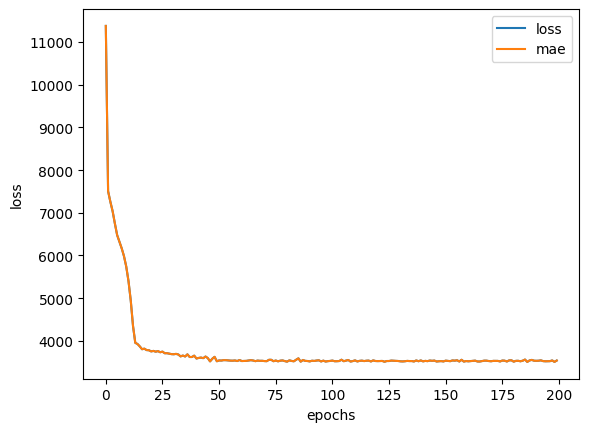

In [ ]:
# Plot history (also known as a loss curve or a training curve)
pd.DataFrame(history.history).plot()
plt.ylabel('loss')
plt.xlabel('epochs')
plt.show()

> 🤔 **Question:** How long should you train for?
it depends. Really... it depends on the problem you're working on. However, many people have asked this question before... so TensorFlow has a solution! It's called the ***EarlyStopping Callback*** which is TensorFlow component you can add to your model to stop training once it stops improving a certain metric.

## Preprocessing data (normalization and standardization

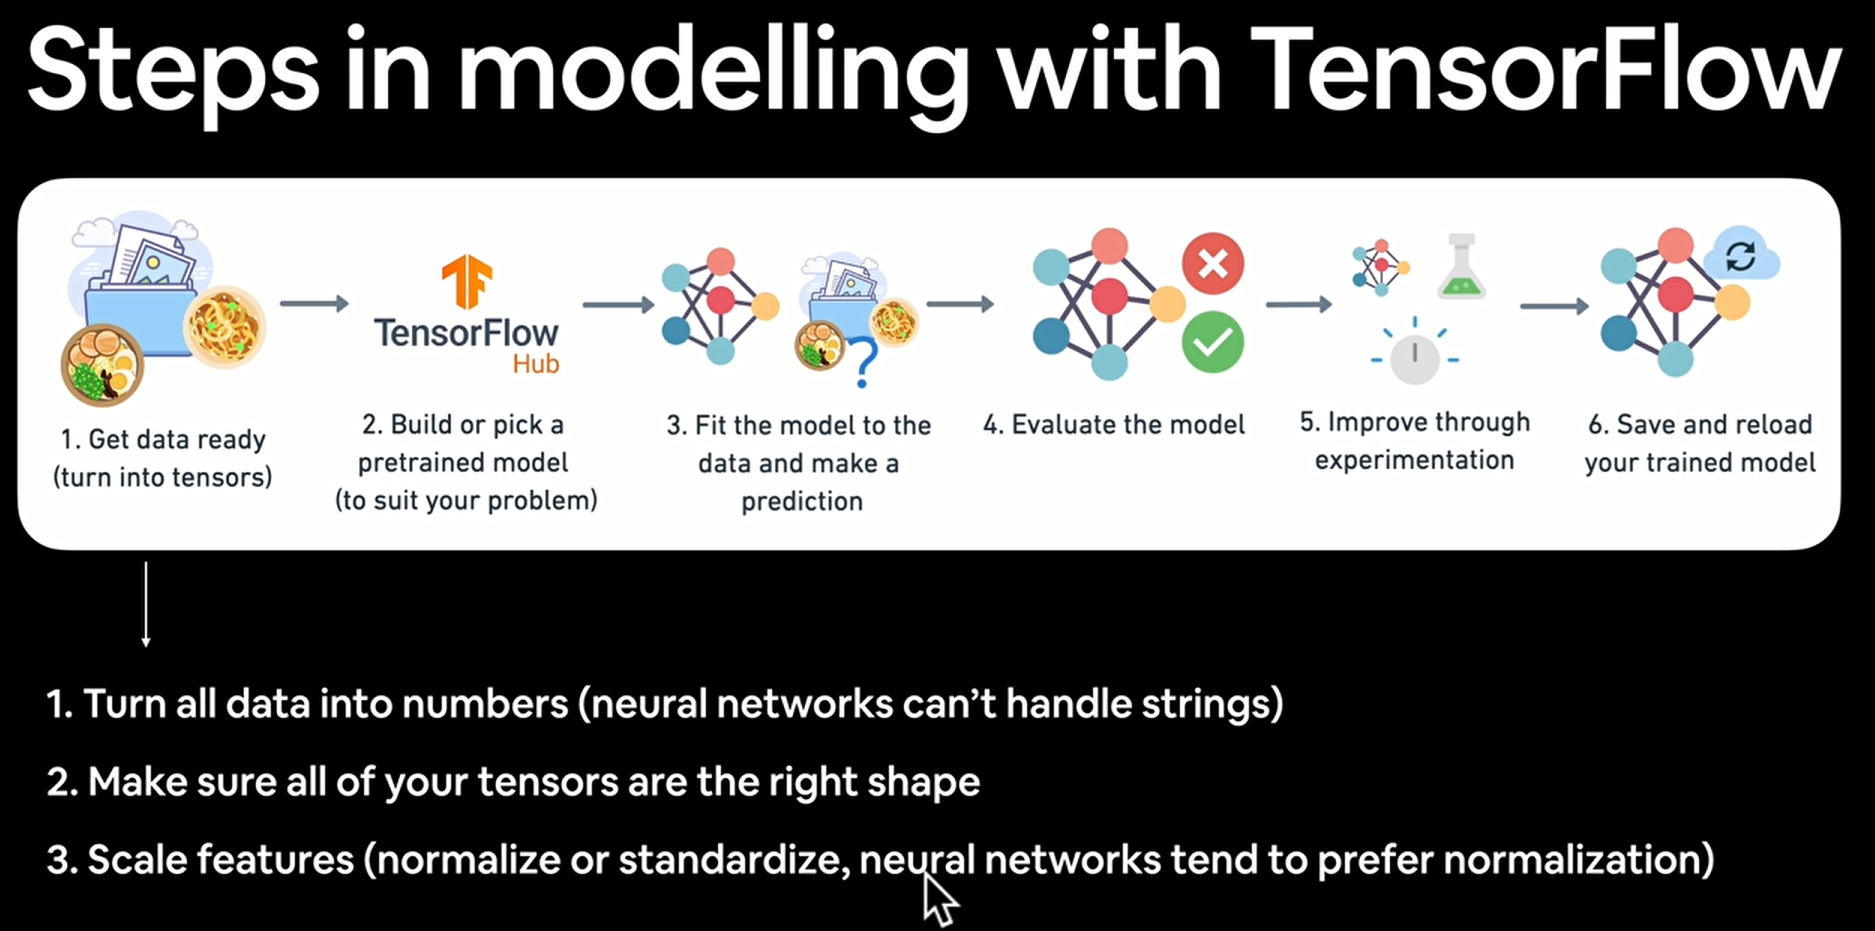

In terms of scaling values, neural networks tend to prefer normalizaton.
If you're not sure on which to use, you could try both and see which performs better.

In [ ]:
X

age     bmi  children  sex_female  sex_male  smoker_no  smoker_yes  \
0      19  27.900         0           1         0          0           1   
1      18  33.770         1           0         1          1           0   
2      28  33.000         3           0         1          1           0   
3      33  22.705         0           0         1          1           0   
4      32  28.880         0           0         1          1           0   
...   ...     ...       ...         ...       ...        ...         ...   
1333   50  30.970         3           0         1          1           0   
1334   18  31.920         0           1         0          1           0   
1335   18  36.850         0           1         0          1           0   
1336   21  25.800         0           1         0          1           0   
1337   61  29.070         0           1         0          0           1   

      region_northeast  region_northwest  region_southeast  region_southwest  
0                    0                 0                 0                 1  
1                    0                 0                 1                 0  
2                    0                 0                 1                 0  
3                    0                 1                 0                 0  
4                    0                 1                 0                 0  
...                ...               ...               ...               ...  
1333                 0                 1                 0                 0  
1334                 1                 0                 0                 0  
1335                 0                 0                 1                 0  
1336                 0                 0                 0                 1  
1337                 0                 1                 0                 0  

[1338 rows x 11 columns]

<Axes: ylabel='Frequency'>

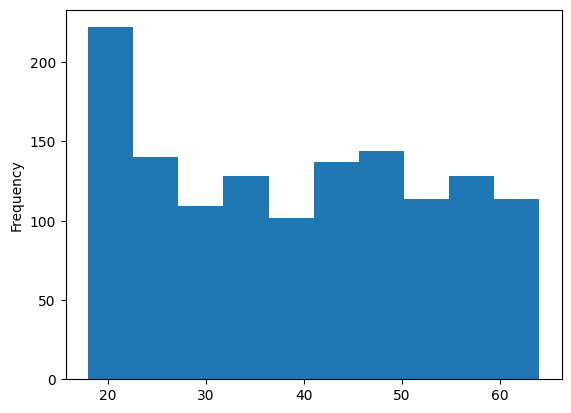

In [ ]:
X['age'].plot(kind='hist')

<Axes: ylabel='Frequency'>

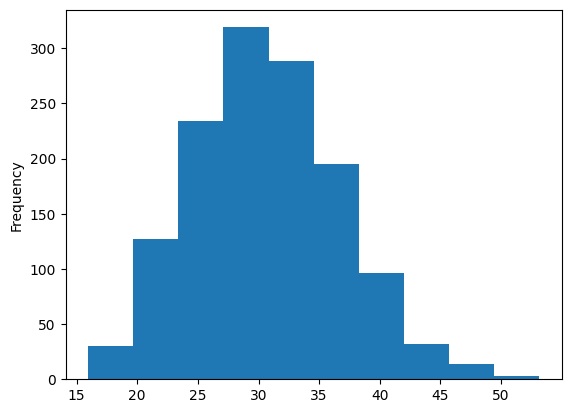

In [ ]:
X['bmi'].plot(kind='hist')

In [ ]:
X.children.value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

<Axes: ylabel='Frequency'>

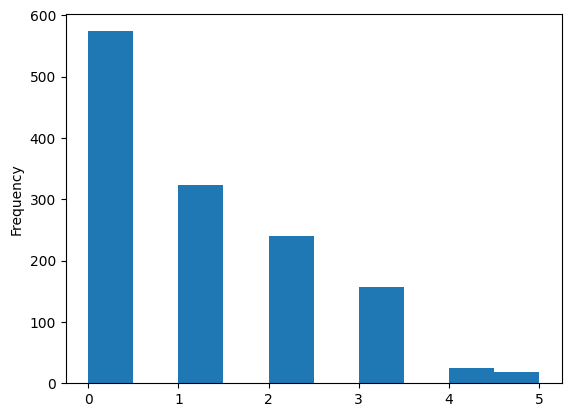

In [ ]:
X['children'].plot(kind='hist')

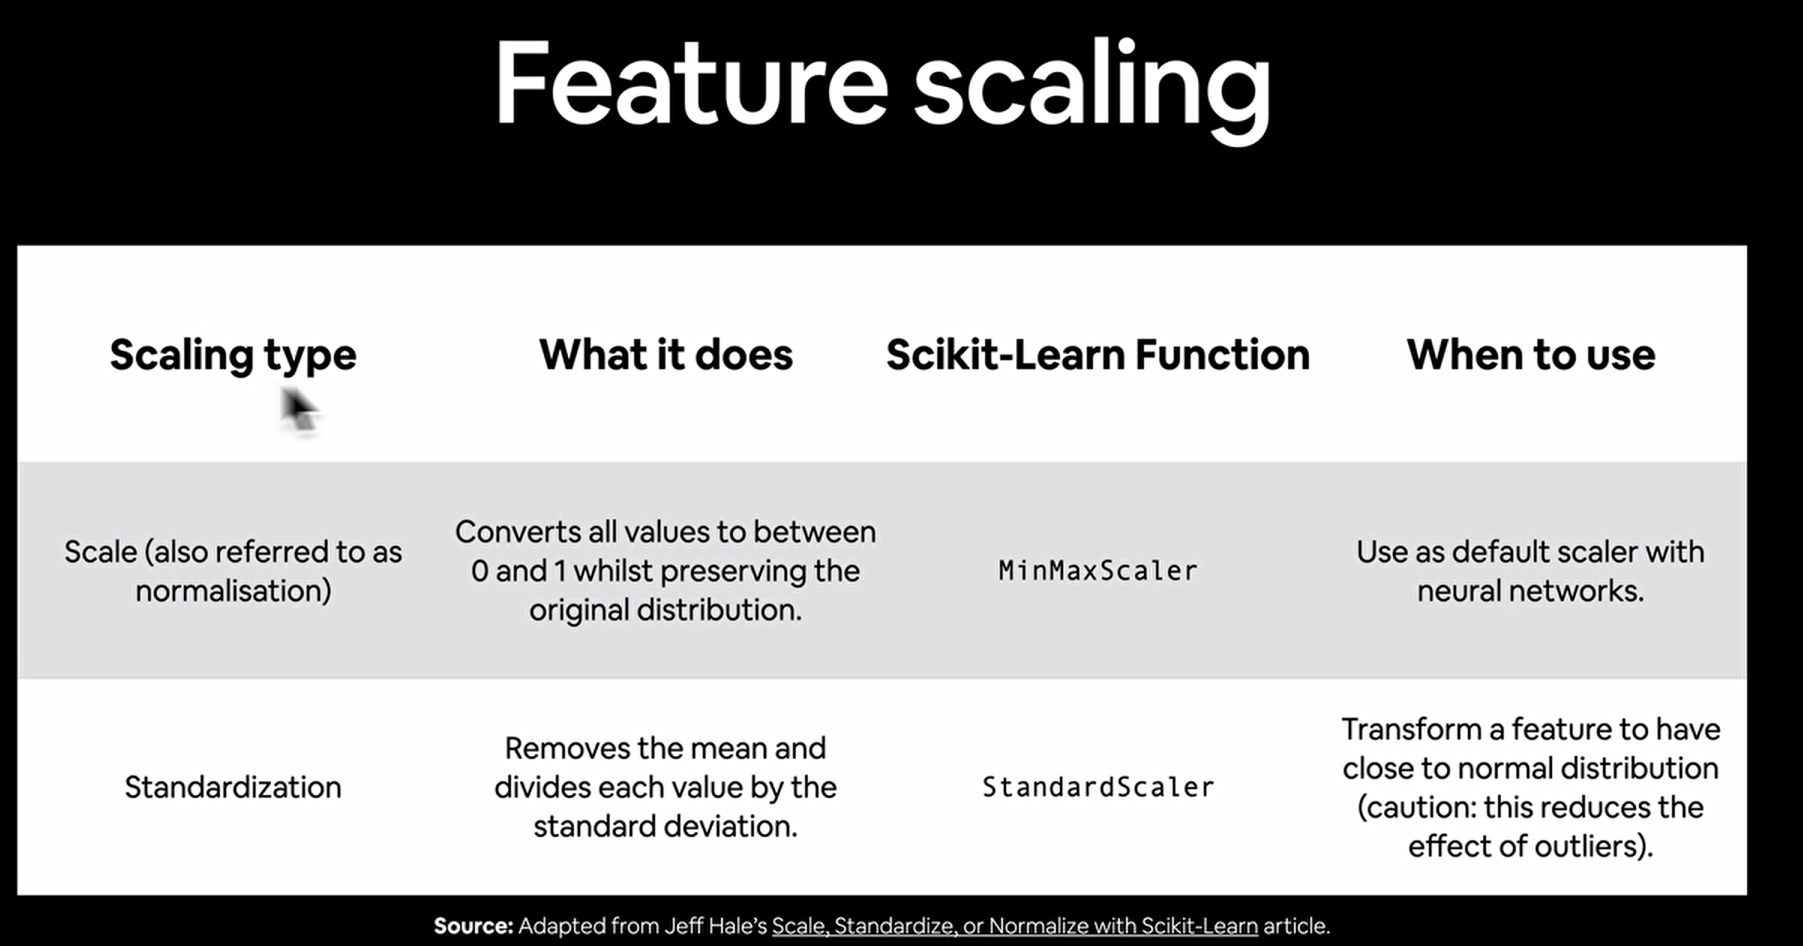

Now again starting from freash

In [ ]:
# Import required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Read in the insurance dataset
insurance = pd.read_csv("https://gist.githubusercontent.com/meperezcuello/82a9f1c1c473d6585e750ad2e3c05a41/raw/d42d226d0dd64e7f5395a0eec1b9190a10edbc03/Medical_Cost.csv")
insurance

age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]

To prepare our data, we can borrow a few classes from `Scikit-Learn`.

In [ ]:
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import  train_test_split

In [ ]:
# Create a column transformer
"""
ct = make_column_transformer(
  (MinMaxScaler(), ['age', 'bmi', 'children']), # turn all values in these columns between 0 and 1
  (OneHotEncoder(handle_unknown='ignore'), ['sex','smoker', 'region'])
)

# Create X and y
X = insurance.drop('charges', axis= 1)
y = insurance['charges']
"""

"\nct = make_column_transformer(\n  (MinMaxScaler(), ['age', 'bmi', 'children']), # turn all values in these columns between 0 and 1\n  (OneHotEncoder(handle_unknown='ignore'), ['sex','smoker', 'region'])\n)\n\n# Create X and y\nX = insurance.drop('charges', axis= 1)\ny = insurance['charges']\n"

In [ ]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
# Another way of doing above same step which is more dynamic
# Separate features and target
X = insurance.drop('charges', axis=1)
y = insurance['charges']

# Use np.number and np.exclude('number')
ct = make_column_transformer(
  (MinMaxScaler(), make_column_selector(dtype_include=np.number)),
  (OneHotEncoder(handle_unknown='ignore'), make_column_selector(dtype_exclude=np.number))
)

In [ ]:
# Build our train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the column transformer to our training data
ct.fit(X_train)

# Transformer training and test data with normalization (MinMaxScaler) and OneHotEncoder
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [ ]:
# What does our data look like now?
X_train.iloc[0]

age                46
sex            female
bmi             19.95
children            2
smoker             no
region      northwest
Name: 560, dtype: object

In [ ]:
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [ ]:
X_train.shape, X_train_normal.shape

((1070, 6), (1070, 11))

Beuatifull! Our data has been normalized and one hot encoded.
Now let's build a neural network model on it and see how it goes.

In [ ]:
# Build a neural network model to fit on our normalized data
tf.random.set_seed(42)
# 1. Create model with Input() layer
insurance_model_5 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])
# 2. Compile model
insurance_model_5.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=['mae'])

# Let's fit our model to the training data
history = insurance_model_5.fit(X_train_normal, y_train, epochs=200, verbose=0)

In [ ]:
# Check the results of the insurance model on the test data
insurance_model_5.evaluate(X_test_normal, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3217.5391 - mae: 3217.5391  


[3162.59326171875, 3162.59326171875]

# Check the results of the insurance model on the test data
insurance_model_4.evaluate(X_test, y_test)
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3214.9729 - mae: 3214.9729  
[3154.74072265625, 3154.74072265625]